In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from glob import glob
from IPython.display import display

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [10]:
PROCESSED_DIR = "../data/processed"
csv_files = sorted(glob(os.path.join(PROCESSED_DIR, "*.csv")))

In [11]:
def analyze_dataset(file_path: str):
    dataset_name = os.path.basename(file_path)
    print(dataset_name)
    df = pd.read_csv(file_path)
    print(df.shape)
    display(df.head())
    display(df.describe(include='all').T)
    display(df.dtypes)
    return df

In [12]:
def plot_missing_values(df: pd.DataFrame, title: str):
    if df.isnull().sum().sum() == 0:
        return
    msno.heatmap(df, figsize=(12,6), fontsize=12)
    plt.title(f"Missing Values - {title}")
    plt.show()

In [13]:
def plot_feature_distributions(df: pd.DataFrame, title: str):
    numeric_cols = df.select_dtypes(include='number').columns
    if len(numeric_cols) == 0:
        return
    df[numeric_cols].hist(bins=30, figsize=(16, 10), color="#007acc", edgecolor='black')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [14]:
def plot_correlation_matrix(df: pd.DataFrame, title: str):
    numeric_cols = df.select_dtypes(include='number').columns
    if len(numeric_cols) < 2:
        return
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(18, 7))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [15]:
def run_eda_on_file(file_path: str):
    title = os.path.splitext(os.path.basename(file_path))[0]
    df = analyze_dataset(file_path)
    plot_missing_values(df, title)
    plot_feature_distributions(df, title)
    plot_correlation_matrix(df, title)

born_rule_dataset.csv
(5000, 8)


,alpha_real,alpha_imag,beta_real,beta_imag,probability,PC1,PC2,PC3
0,0.560598,-0.144981,0.736001,1.767671,-0.804279,0.674968,1.262630,-1.064680
1,0.172308,-1.440948,-1.311858,-0.411553,0.471973,-1.573177,-1.154212,-0.444339
2,-0.822576,0.183683,-1.736494,0.576005,-0.058776,-1.624149,0.889373,0.096329
3,0.164751,-1.640875,-1.123078,0.177548,-0.745882,-1.330370,-0.448376,-1.588987
4,0.356991,-1.889567,0.336656,-0.399712,-0.542413,-0.251551,-1.184681,-1.462200


,count,mean,std,min,25%,50%,75%,max
alpha_real,5000.0,-3.694822e-17,1.000100,-1.993178,-0.800701,-0.004852,0.804739,1.975184
alpha_imag,5000.0,6.394885e-18,1.000100,-1.995903,-0.804039,-0.007693,0.796069,2.026741
beta_real,5000.0,3.126388e-17,1.000100,-1.998475,-0.797026,0.003794,0.809155,1.975541
beta_imag,5000.0,1.492140e-17,1.000100,-1.970452,-0.810468,0.003029,0.810463,2.006643
probability,5000.0,-1.193712e-16,1.000100,-1.427148,-0.746440,-0.214177,0.496380,7.480836
PC1,5000.0,2.877698e-17,1.012760,-2.405786,-0.816593,-0.004818,0.824334,2.209758
PC2,5000.0,4.618528e-18,1.008033,-3.312798,-0.771947,-0.005131,0.802958,2.265518
PC3,5000.0,-9.947598e-18,1.002232,-2.196783,-0.707657,-0.097488,0.584003,6.313460


alpha_real     float64
alpha_imag     float64
beta_real      float64
beta_imag      float64
probability    float64
PC1            float64
PC2            float64
PC3            float64
dtype: object

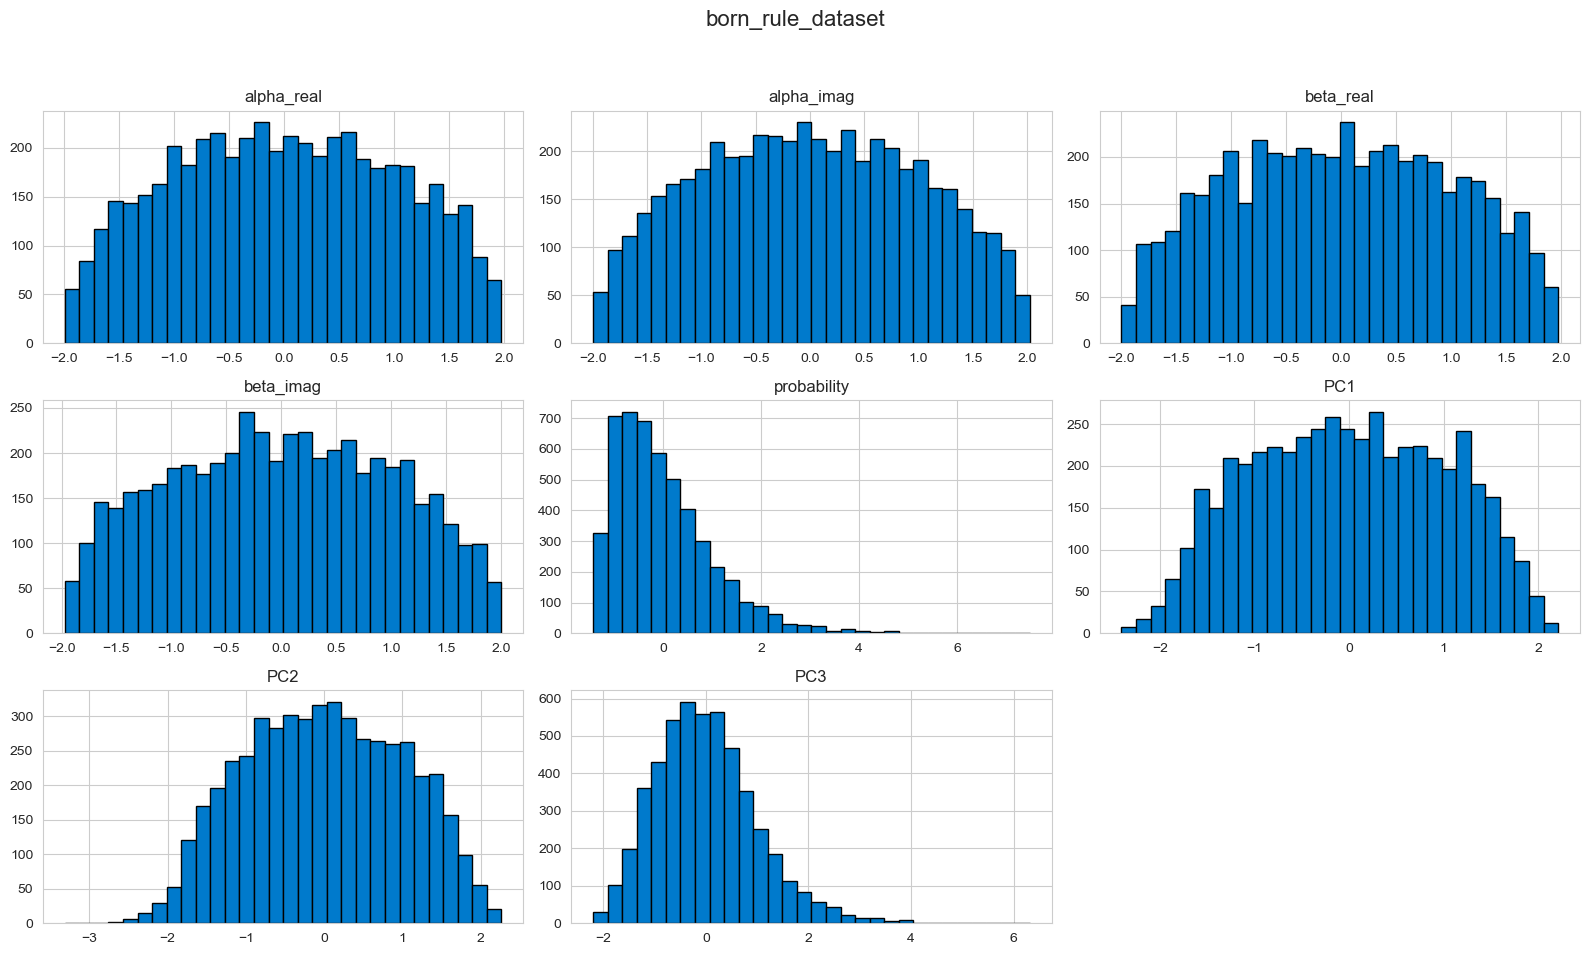

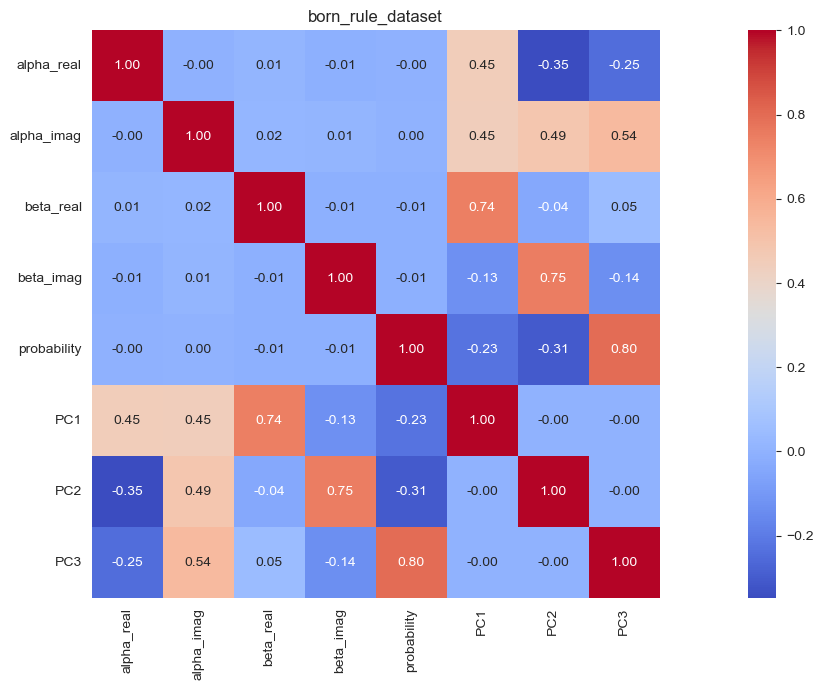

cross_entropy_dataset.csv
(5000, 14)


,y_true_1,y_true_2,y_true_3,y_true_4,y_true_5,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,loss,PC1,PC2,PC3
0,-0.491548,-0.520549,2.040904,-0.495308,-0.502499,-0.213706,-0.689654,-0.022450,1.600038,-0.726238,-0.373722,1.476467,-0.449501,-1.070757
1,-0.491548,-0.520549,-0.489979,-0.495308,1.990055,0.184692,-0.994379,-0.119321,1.395309,-0.502707,0.187816,2.477359,0.204293,-0.440170
2,2.034391,-0.520549,-0.489979,-0.495308,-0.502499,0.333420,0.426810,0.363949,-0.133491,-1.027228,-0.666730,0.122985,0.170954,0.701304
3,-0.491548,-0.520549,2.040904,-0.495308,-0.502499,1.362853,-1.147969,0.607399,-0.464383,-0.357494,-0.831787,0.369325,-0.213124,-0.820944
4,-0.491548,1.921050,-0.489979,-0.495308,-0.502499,-0.189233,-0.352419,1.608913,-0.421544,-0.679658,-0.045469,-0.566283,2.331506,0.659541


,count,mean,std,min,25%,50%,75%,max
y_true_1,5000.0,-2.629008e-17,1.000100,-0.491548,-0.491548,-0.491548,-0.491548,2.034391
y_true_2,5000.0,-7.602807e-17,1.000100,-0.520549,-0.520549,-0.520549,-0.520549,1.921050
y_true_3,5000.0,5.826450e-17,1.000100,-0.489979,-0.489979,-0.489979,-0.489979,2.040904
y_true_4,5000.0,-2.842171e-18,1.000100,-0.495308,-0.495308,-0.495308,-0.495308,2.018946
y_true_5,5000.0,3.836931e-17,1.000100,-0.502499,-0.502499,-0.502499,-0.502499,1.990055
y_pred_1,5000.0,-9.379164e-17,1.000100,-1.234309,-0.774955,-0.293959,0.519154,4.707831
y_pred_2,5000.0,-6.252776e-17,1.000100,-1.210670,-0.759693,-0.285570,0.487956,4.347266
y_pred_3,5000.0,-9.663381e-17,1.000100,-1.197685,-0.754276,-0.298334,0.463970,4.317122
y_pred_4,5000.0,-9.379164e-17,1.000100,-1.213204,-0.754223,-0.310960,0.505628,4.421086
y_pred_5,5000.0,1.506351e-16,1.000100,-1.224982,-0.757168,-0.304384,0.483383,4.697415


y_true_1    float64
y_true_2    float64
y_true_3    float64
y_true_4    float64
y_true_5    float64
y_pred_1    float64
y_pred_2    float64
y_pred_3    float64
y_pred_4    float64
y_pred_5    float64
loss        float64
PC1         float64
PC2         float64
PC3         float64
dtype: object

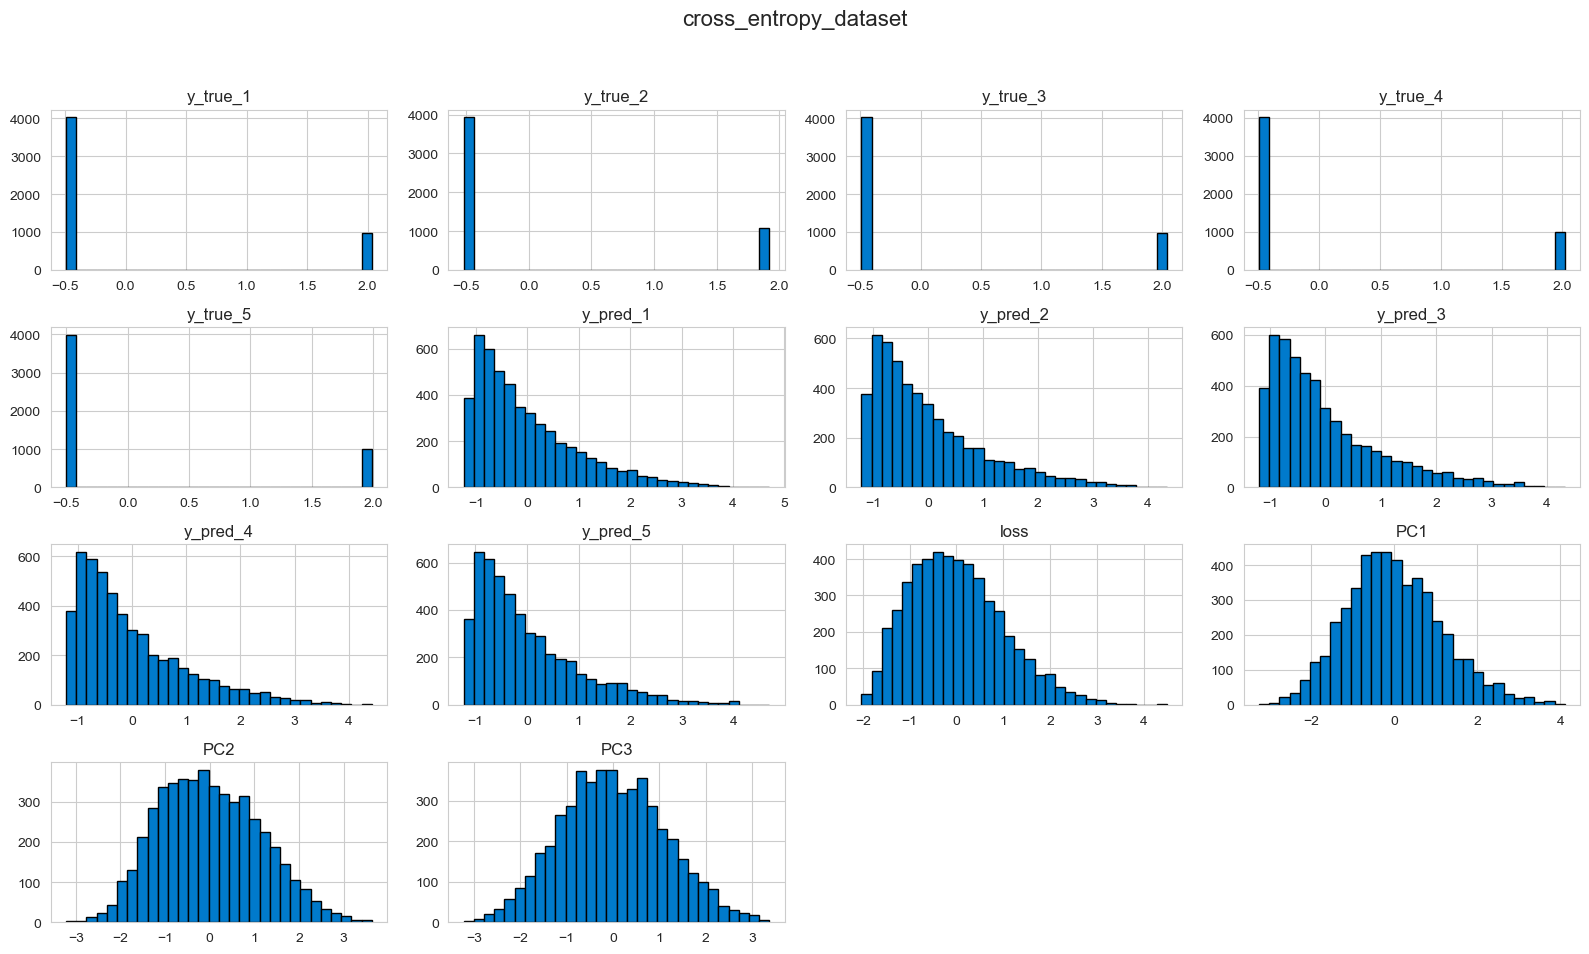

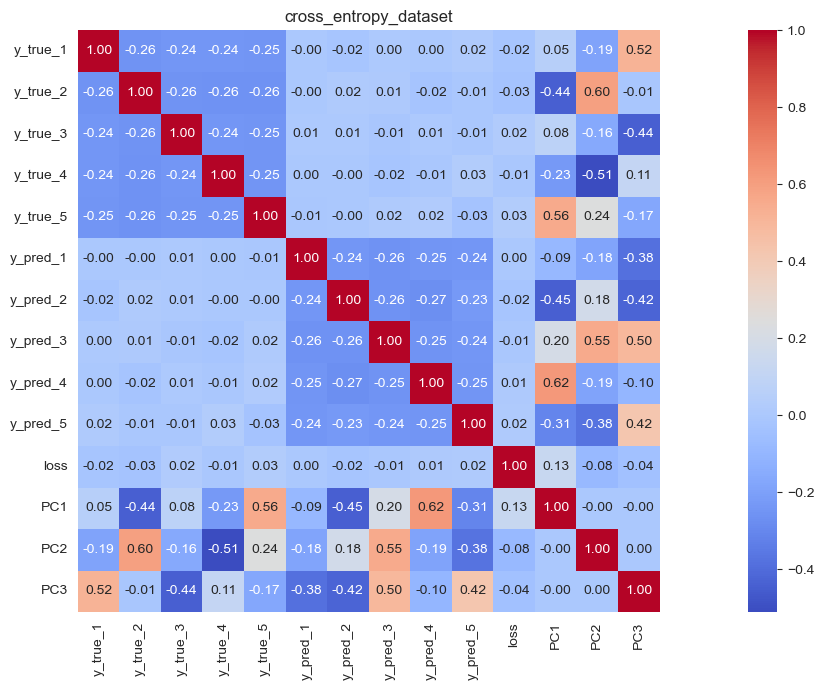

density_matrices.csv
(5000, 13)


,rho_00_real,rho_00_imag,rho_01_real,rho_01_imag,rho_10_real,rho_10_imag,rho_11_real,rho_11_imag,trace,purity,PC1,PC2,PC3
0,0.296456,0.0,-0.610150,1.322523,-0.610150,-1.322523,-0.296456,0.0,4.440892e-16,-0.482162,1.990352,0.095860,0.662548
1,-2.303395,0.0,0.145117,0.254122,0.145117,-0.254122,2.303395,0.0,-2.220446e-16,1.592405,-0.995442,2.924828,1.216786
2,0.291486,0.0,-1.123513,-0.717911,-1.123513,0.717911,-0.291486,0.0,0.000000e+00,-0.769916,0.442571,0.200413,-1.880958
3,0.248068,0.0,-0.814461,-2.067985,-0.814461,2.067985,-0.248068,0.0,-2.220446e-16,1.335211,-1.187572,-0.016767,-2.907051
4,-0.123865,0.0,-2.177141,-0.447596,-2.177141,0.447596,0.123865,0.0,2.220446e-16,1.312042,1.445476,1.414792,-2.399790


,count,mean,std,min,25%,50%,75%,max
rho_00_real,5000.0,-4.135359e-16,1.000100e+00,-2.399705e+00,-0.764005,0.006005,0.762674,2.430492e+00
rho_00_imag,5000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
rho_01_real,5000.0,2.700062e-17,1.000100e+00,-2.289021e+00,-0.749243,-0.011197,0.763881,2.421312e+00
rho_01_imag,5000.0,-2.273737e-17,1.000100e+00,-2.394051e+00,-0.754854,-0.027855,0.769823,2.350515e+00
rho_10_real,5000.0,2.700062e-17,1.000100e+00,-2.289021e+00,-0.749243,-0.011197,0.763881,2.421312e+00
rho_10_imag,5000.0,2.273737e-17,1.000100e+00,-2.350515e+00,-0.769823,0.027855,0.754854,2.394051e+00
rho_11_real,5000.0,-1.278977e-17,1.000100e+00,-2.430492e+00,-0.762674,-0.006005,0.764005,2.399705e+00
rho_11_imag,5000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
trace,5000.0,-2.908784e-18,1.868898e-16,-7.771561e-16,0.000000,0.000000,0.000000,8.881784e-16
purity,5000.0,1.662670e-16,1.000100e+00,-2.006326e+00,-0.810681,0.019189,0.815139,2.009003e+00


rho_00_real    float64
rho_00_imag    float64
rho_01_real    float64
rho_01_imag    float64
rho_10_real    float64
rho_10_imag    float64
rho_11_real    float64
rho_11_imag    float64
trace          float64
purity         float64
PC1            float64
PC2            float64
PC3            float64
dtype: object

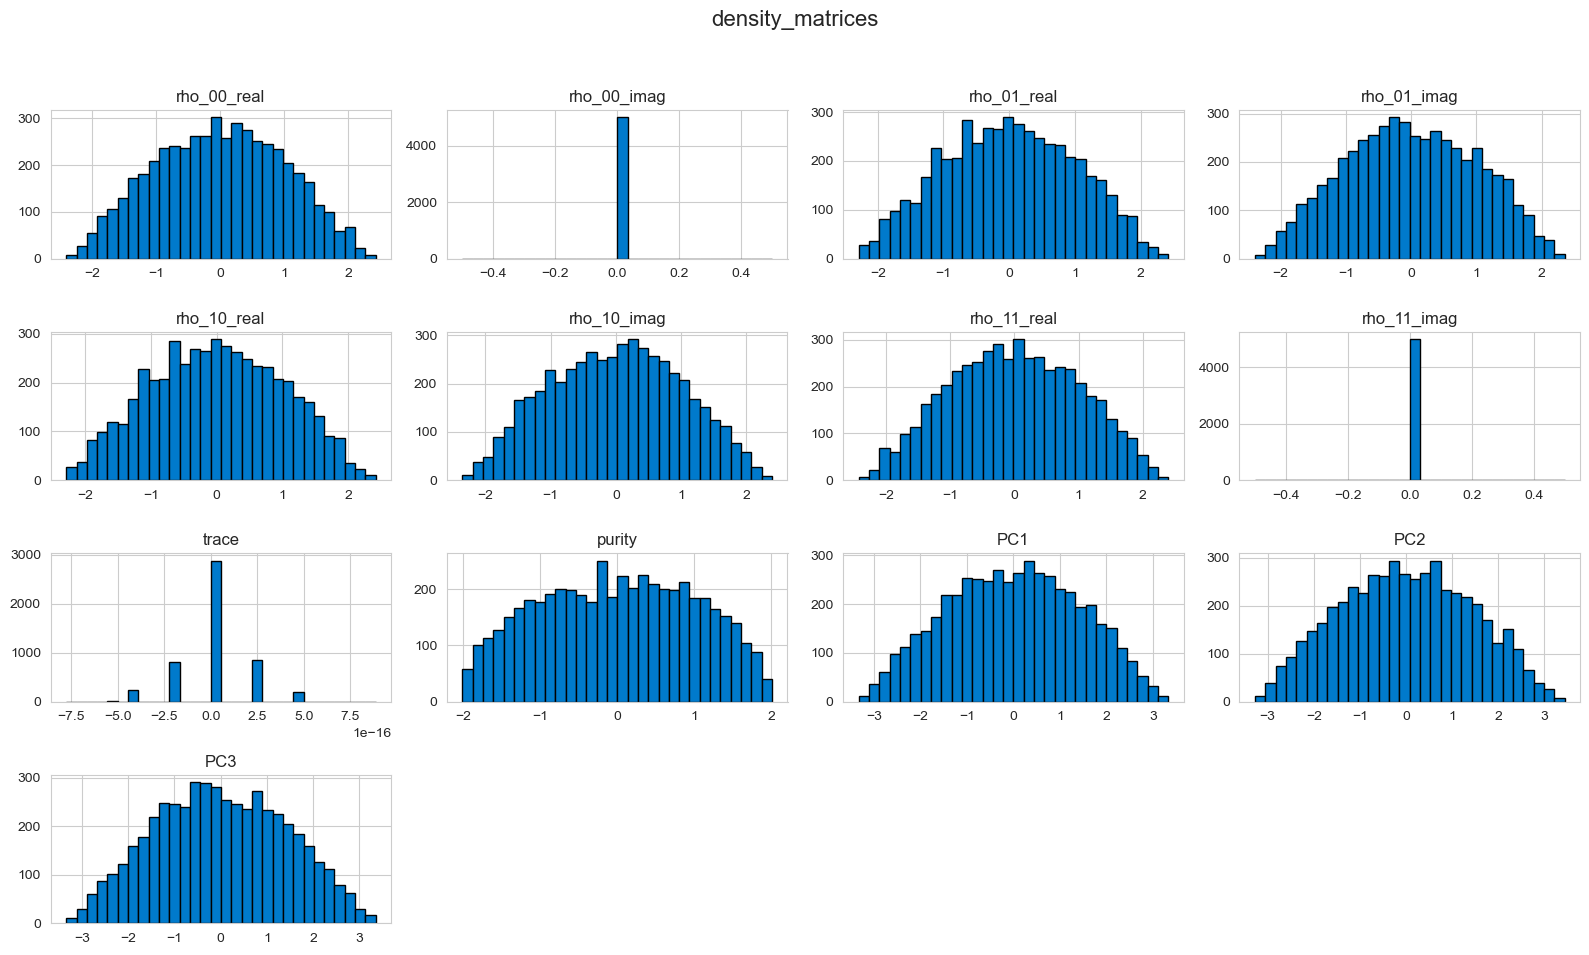

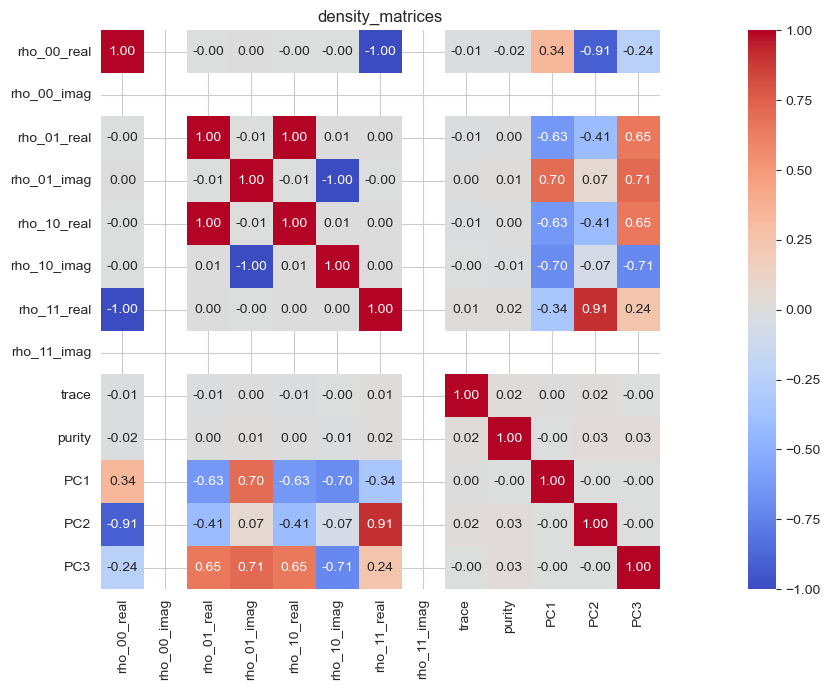

expectation_value_dataset.csv
(5000, 12)


,alpha_real,alpha_imag,beta_real,beta_imag,obs_00,obs_01_real,obs_01_imag,obs_11,expectation_value,PC1,PC2,PC3
0,0.574590,-0.147324,0.758619,1.748200,-0.259161,-0.228307,1.575925,0.781546,-0.198036,-0.060984,0.618153,1.045982
1,-0.955471,1.139173,-0.932607,-0.971558,0.213305,-1.932401,-1.717852,-0.558070,1.497418,1.025203,-2.562002,-0.285677
2,-1.010064,0.333002,-0.894586,-1.437330,1.427611,-0.219822,0.068977,-1.426947,-0.618789,-0.337299,-1.385506,-1.209443
3,-0.808411,0.181691,-1.703958,0.552815,-0.622837,-0.286719,-0.598160,1.874461,0.998063,1.469880,0.402817,0.975991
4,-0.010260,-1.163930,0.918049,-1.361807,0.180460,-1.979480,-1.322363,0.206727,-0.528404,-0.074419,-0.863877,-0.631967


,count,mean,std,min,25%,50%,75%,max
alpha_real,5000.0,2.842171e-17,1.000100,-1.979376,-0.801328,0.012202,0.793906,1.989000
alpha_imag,5000.0,3.836931e-17,1.000100,-2.002421,-0.795672,-0.009042,0.806913,2.023004
beta_real,5000.0,0.000000e+00,1.000100,-1.954185,-0.798634,0.001921,0.810671,2.003884
beta_imag,5000.0,-2.273737e-17,1.000100,-2.014896,-0.799747,0.007202,0.793646,1.987918
obs_00,5000.0,-8.526513e-18,1.000100,-3.376505,-0.674318,0.007780,0.663169,3.556865
obs_01_real,5000.0,-2.984279e-17,1.000100,-4.522649,-0.683596,0.004303,0.689127,3.394136
obs_01_imag,5000.0,1.776357e-17,1.000100,-3.641973,-0.680094,-0.014568,0.692079,3.593204
obs_11,5000.0,-2.131628e-17,1.000100,-3.248215,-0.691218,-0.000897,0.651522,3.963851
expectation_value,5000.0,-3.126388e-17,1.000100,-3.412182,-0.678705,-0.028610,0.675011,3.879091
PC1,5000.0,-2.842171e-17,1.272514,-4.416585,-0.867504,-0.020276,0.875019,4.471013


alpha_real           float64
alpha_imag           float64
beta_real            float64
beta_imag            float64
obs_00               float64
obs_01_real          float64
obs_01_imag          float64
obs_11               float64
expectation_value    float64
PC1                  float64
PC2                  float64
PC3                  float64
dtype: object

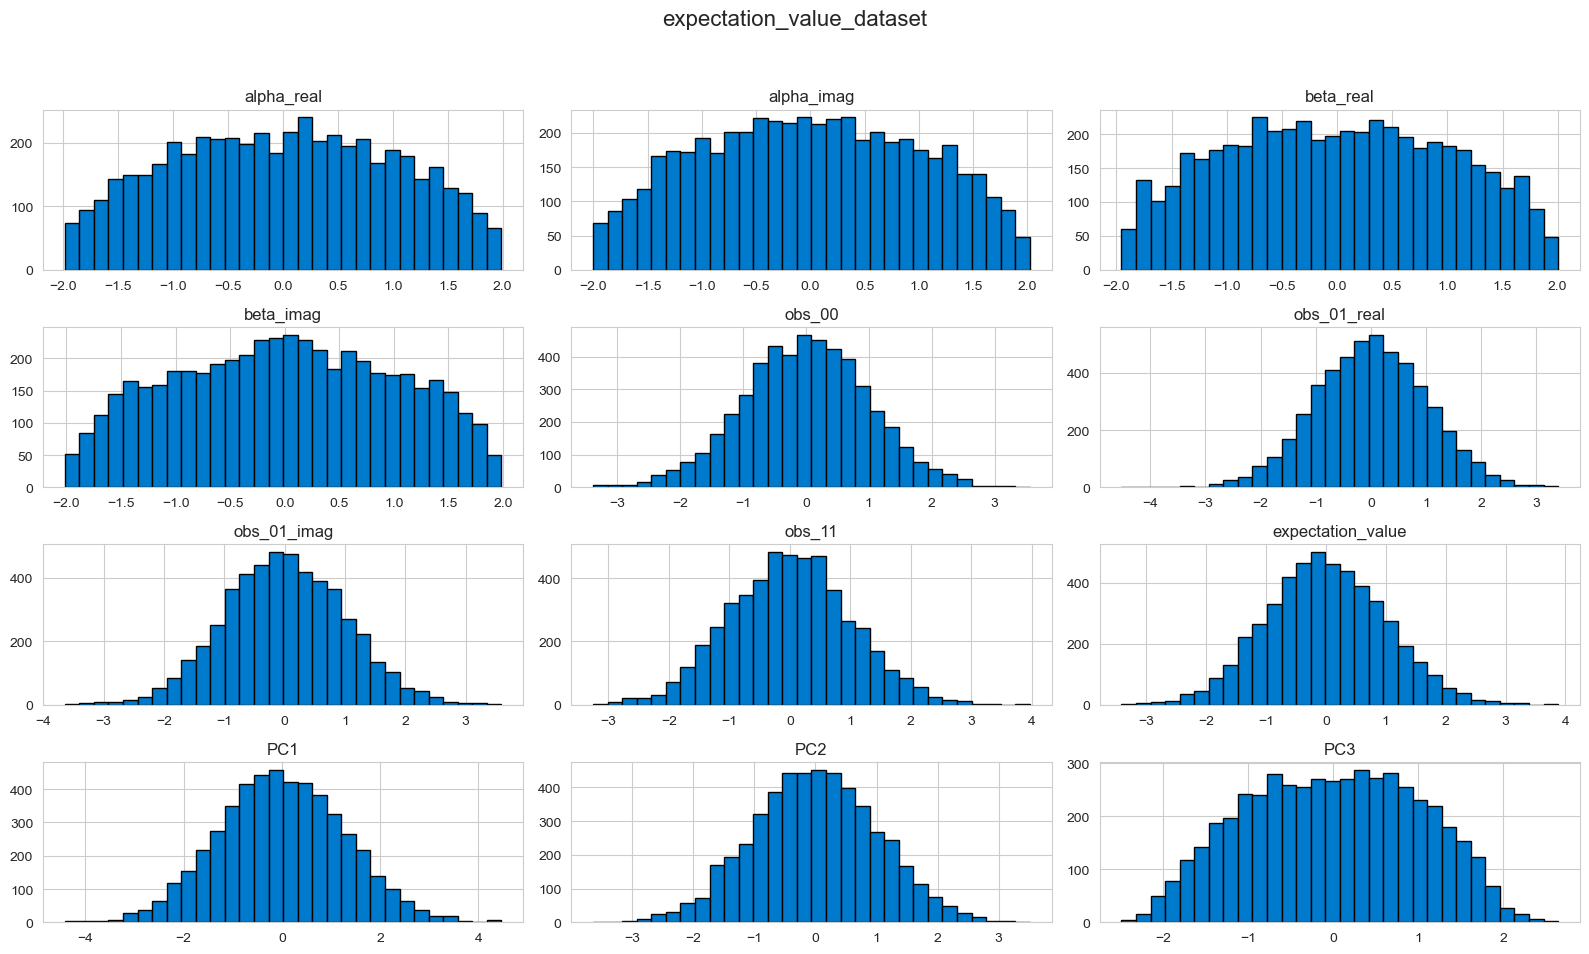

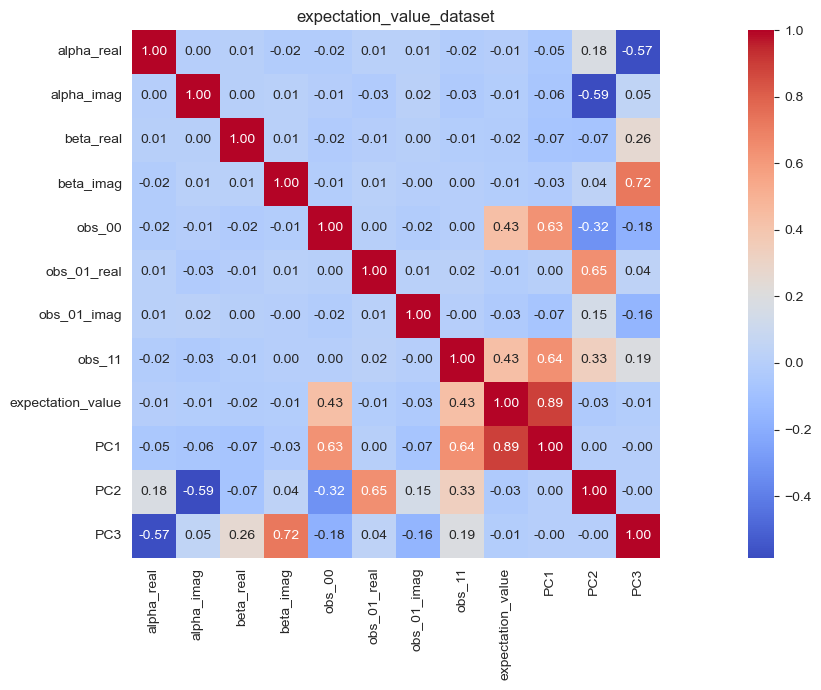

gradient_descent_dataset.csv
(5000, 19)


,theta_1,theta_2,theta_3,theta_4,theta_5,grad_1,grad_2,grad_3,grad_4,grad_5,learning_rate,theta_new_1,theta_new_2,theta_new_3,theta_new_4,theta_new_5,PC1,PC2,PC3
0,0.478373,-0.158692,0.662546,1.552308,-0.245534,0.478373,-0.158692,0.662546,1.552308,-0.245534,0.0,0.478373,-0.158692,0.662546,1.552308,-0.245534,-0.933894,2.263165,1.121455
1,-0.239628,1.569897,0.782050,-0.456629,0.541911,-0.239628,1.569897,0.782050,-0.456629,0.541911,0.0,-0.239628,1.569897,0.782050,-0.456629,0.541911,-0.386139,-2.591325,0.551364
2,-0.464878,-0.488276,0.257638,-1.912342,-1.756895,-0.464878,-0.488276,0.257638,-1.912342,-1.756895,0.0,-0.464878,-0.488276,0.257638,-1.912342,-1.756895,-0.844268,-1.474967,0.469082
3,-0.562009,-1.038916,0.329778,-0.898795,-1.439962,-0.562009,-1.038916,0.329778,-0.898795,-1.439962,0.0,-0.562009,-1.038916,0.329778,-0.898795,-1.439962,-0.101780,0.262927,0.760307
4,1.430272,-0.246770,0.083556,-1.419781,-0.560049,1.430272,-0.246770,0.083556,-1.419781,-0.560049,0.0,1.430272,-0.246770,0.083556,-1.419781,-0.560049,-1.794416,-1.212966,0.784081


,count,mean,std,min,25%,50%,75%,max
theta_1,5000.0,-5.684342e-18,1.000100,-3.863046,-0.673207,0.002833,0.684937,3.847600
theta_2,5000.0,-4.973799e-18,1.000100,-3.731760,-0.656827,-0.015955,0.656261,3.948303
theta_3,5000.0,-6.394885e-18,1.000100,-3.611698,-0.699468,0.003857,0.671024,3.161859
theta_4,5000.0,1.065814e-17,1.000100,-3.318464,-0.673312,0.018521,0.671101,4.532741
theta_5,5000.0,1.421085e-18,1.000100,-3.917801,-0.675232,0.002205,0.688864,3.897816
grad_1,5000.0,-5.684342e-18,1.000100,-3.863046,-0.673207,0.002833,0.684937,3.847600
grad_2,5000.0,-4.973799e-18,1.000100,-3.731760,-0.656827,-0.015955,0.656261,3.948303
grad_3,5000.0,-6.394885e-18,1.000100,-3.611698,-0.699468,0.003857,0.671024,3.161859
grad_4,5000.0,1.065814e-17,1.000100,-3.318464,-0.673312,0.018521,0.671101,4.532741
grad_5,5000.0,1.421085e-18,1.000100,-3.917801,-0.675232,0.002205,0.688864,3.897816


theta_1          float64
theta_2          float64
theta_3          float64
theta_4          float64
theta_5          float64
grad_1           float64
grad_2           float64
grad_3           float64
grad_4           float64
grad_5           float64
learning_rate    float64
theta_new_1      float64
theta_new_2      float64
theta_new_3      float64
theta_new_4      float64
theta_new_5      float64
PC1              float64
PC2              float64
PC3              float64
dtype: object

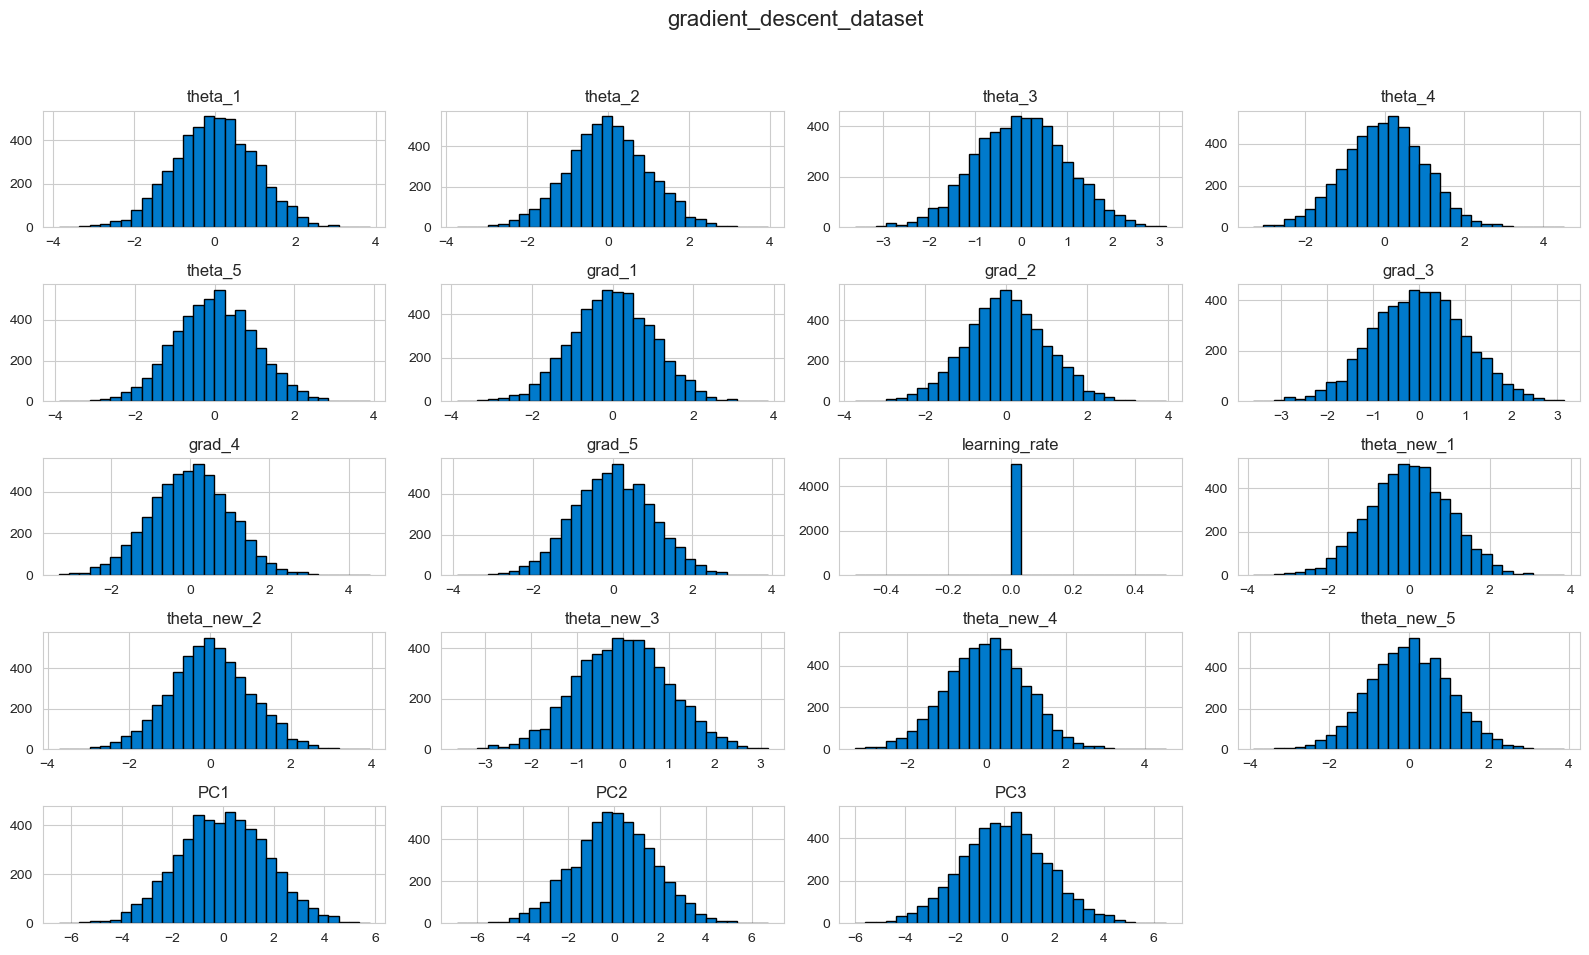

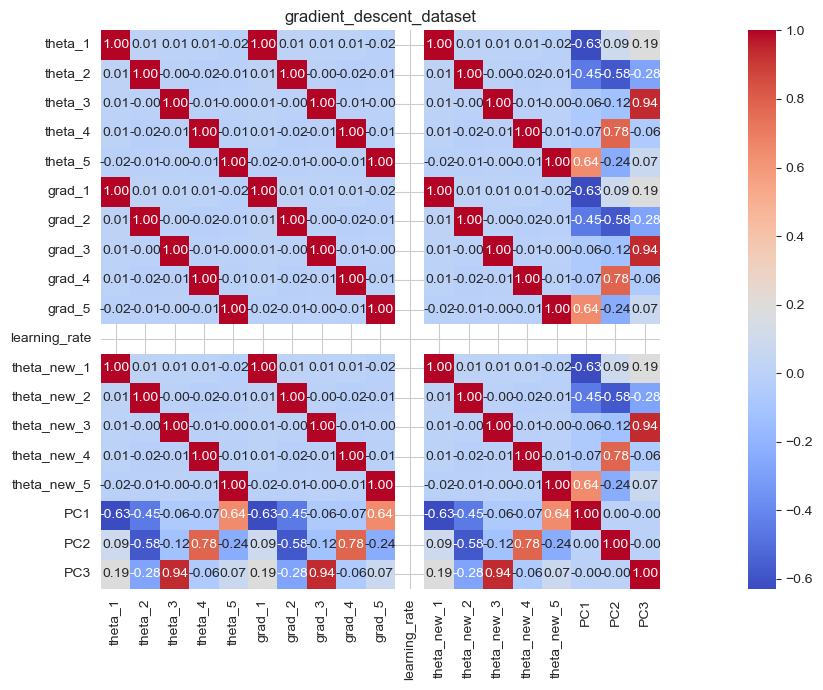

hadamard_data.csv
(5000, 13)


,Re(a),Im(a),Re(b),Im(b),Re(Hψ₀),Im(Hψ₀),Re(Hψ₁),Im(Hψ₁),P0,P1,PC1,PC2,PC3
0,-0.738647,1.033590,0.359490,-0.057918,-0.317990,0.823742,-0.680938,0.676339,0.672646,-0.672646,1.051497,1.435696,0.068171
1,-1.145152,-1.144111,-1.607355,2.236635,-2.324431,0.926090,0.290657,-2.097258,-1.554308,1.554308,2.987423,-2.475617,-2.133291
2,0.026676,0.367224,-1.818665,1.190401,-1.516218,1.317132,1.147648,-0.511422,0.258514,-0.258514,2.638302,-1.741417,0.722089
3,2.085798,-0.876364,-1.019160,-1.021623,0.894536,-1.604255,1.925345,0.091202,-1.059243,1.059243,-2.302411,-1.908483,2.037469
4,-0.260777,0.919840,0.421158,-0.338919,0.136678,0.489973,-0.423408,0.780294,0.755721,-0.755721,0.328951,1.263760,0.472223


,count,mean,std,min,25%,50%,75%,max
Re(a),5000.0,-4.760636e-17,1.000100,-1.890854,-0.802301,0.077116,0.762610,2.351758
Im(a),5000.0,3.268497e-17,1.000100,-1.888875,-0.787060,0.075494,0.760193,2.388613
Re(b),5000.0,3.694822e-17,1.000100,-1.884010,-0.801203,0.089526,0.754691,2.374783
Im(b),5000.0,1.108447e-16,1.000100,-1.895046,-0.808755,0.093321,0.762658,2.344500
Re(Hψ₀),5000.0,-4.035883e-16,1.000100,-3.147324,-0.638135,0.095140,0.763299,1.916151
Im(Hψ₀),5000.0,7.744916e-17,1.000100,-3.124743,-0.629038,0.089289,0.758818,1.902725
Re(Hψ₁),5000.0,1.705303e-17,1.000100,-2.623658,-0.720202,0.016288,0.723198,2.580465
Im(Hψ₁),5000.0,-3.836931e-17,1.000100,-2.530805,-0.719815,-0.004264,0.710250,2.650962
P0,5000.0,-8.810730e-17,1.000100,-3.098679,-0.633949,0.237274,0.838763,1.238731
P1,5000.0,-6.252776e-17,1.000100,-1.238731,-0.838763,-0.237274,0.633949,3.098679


Re(a)      float64
Im(a)      float64
Re(b)      float64
Im(b)      float64
Re(Hψ₀)    float64
Im(Hψ₀)    float64
Re(Hψ₁)    float64
Im(Hψ₁)    float64
P0         float64
P1         float64
PC1        float64
PC2        float64
PC3        float64
dtype: object

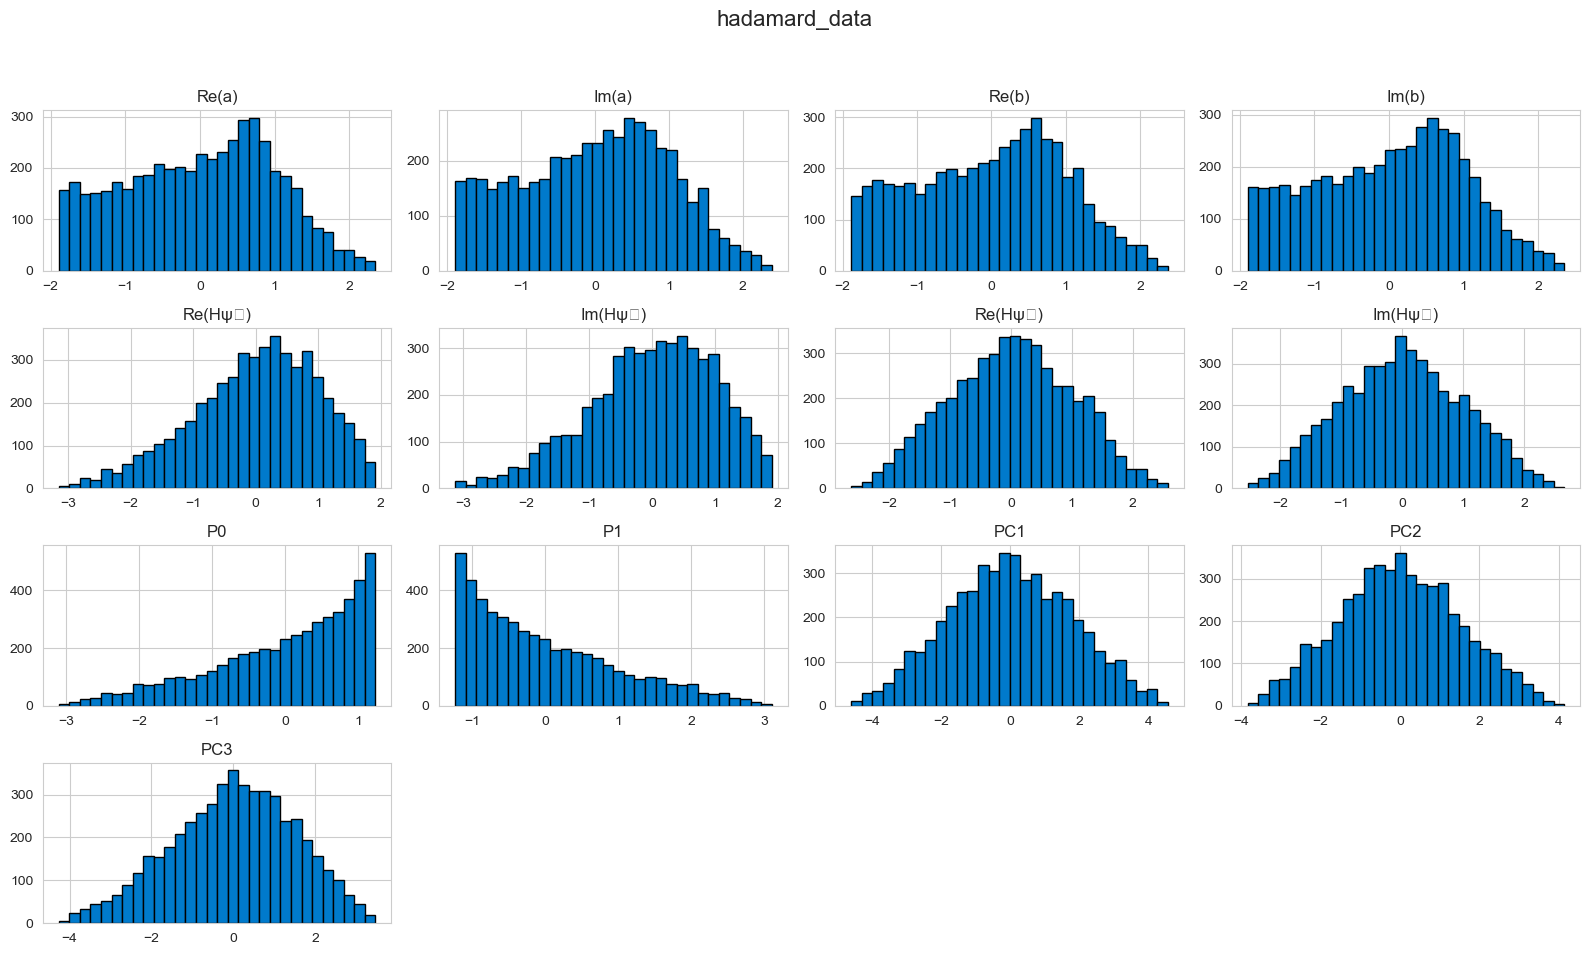

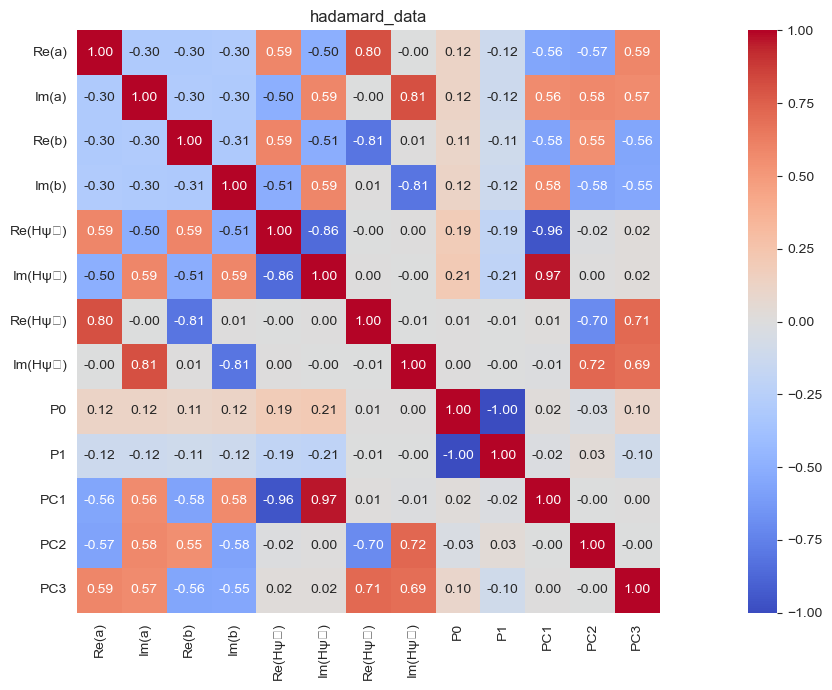

pauli_z_expectation_dataset.csv
(5000, 4)


,theta,z_expectation,PC1,PC2
0,-0.422272,-1.006050,0.412794,-1.009976
1,1.567248,1.340479,0.160350,2.056073
2,0.812010,-0.167715,0.692770,0.455585
3,0.351605,-1.160196,1.069005,-0.571760
4,-1.176823,0.780346,-1.383927,-0.280351


,count,mean,std,min,25%,50%,75%,max
theta,5000.0,8.739676e-17,1.000100,-1.715512,-0.873498,0.010969,0.867627,1.736456
z_expectation,5000.0,1.705303e-17,1.000100,-1.423599,-0.998413,0.005324,1.003501,1.407819
PC1,5000.0,2.469136e-17,1.009528,-2.208529,-0.650670,0.264782,0.825043,1.090789
PC2,5000.0,2.557954e-17,0.990582,-1.075318,-0.797235,-0.244508,0.595981,2.223336


theta            float64
z_expectation    float64
PC1              float64
PC2              float64
dtype: object

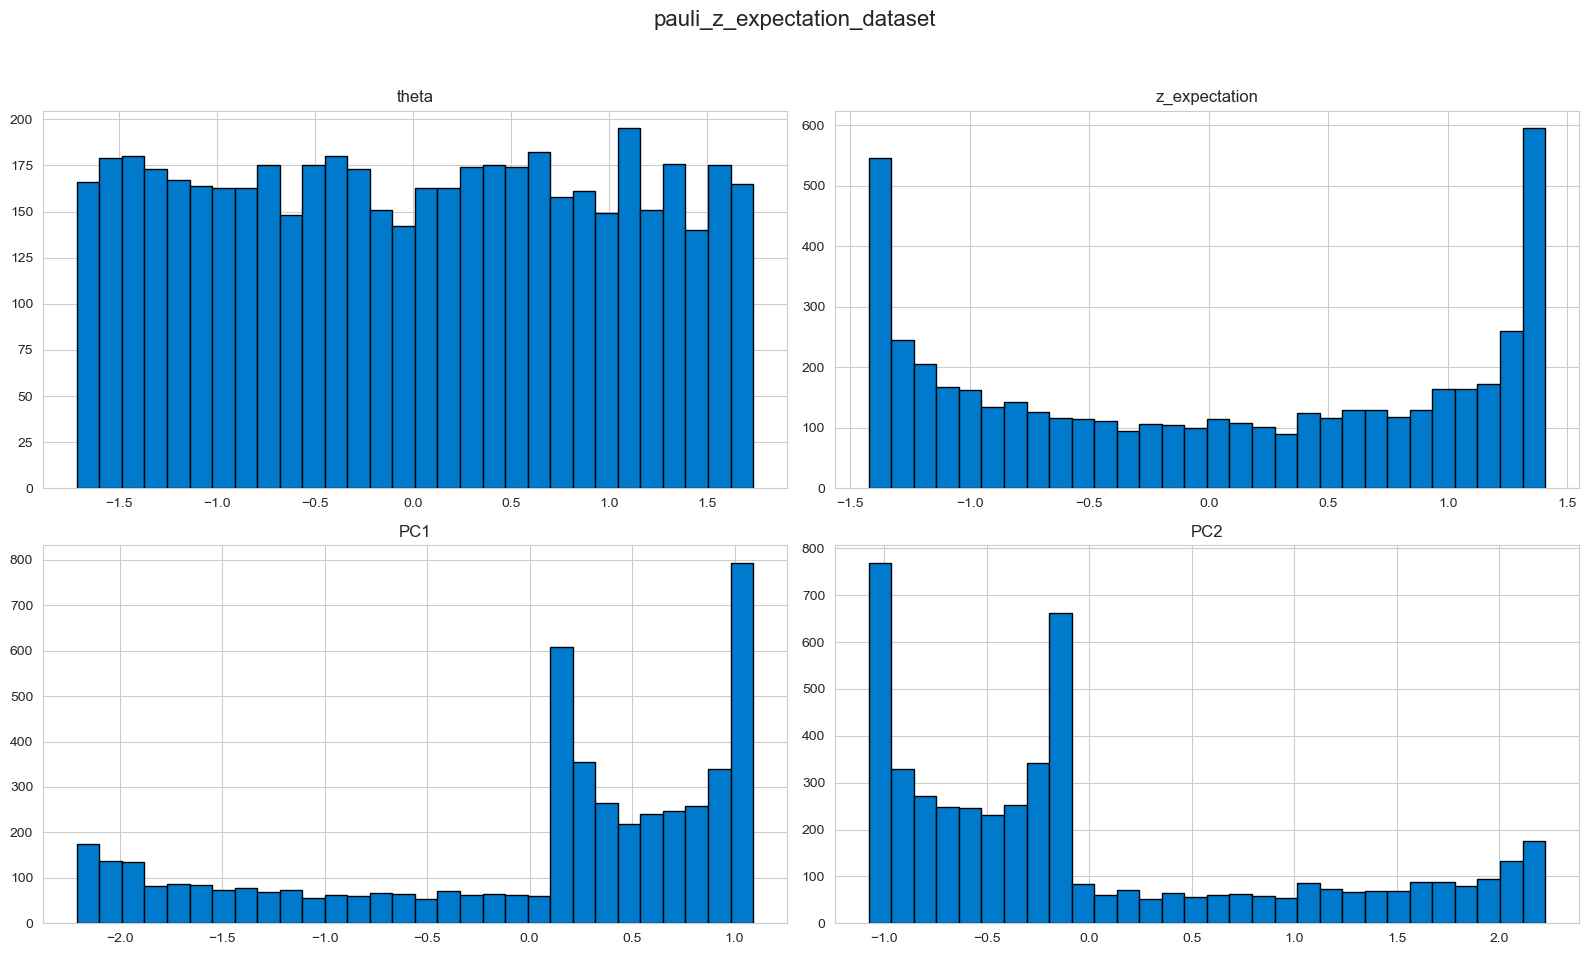

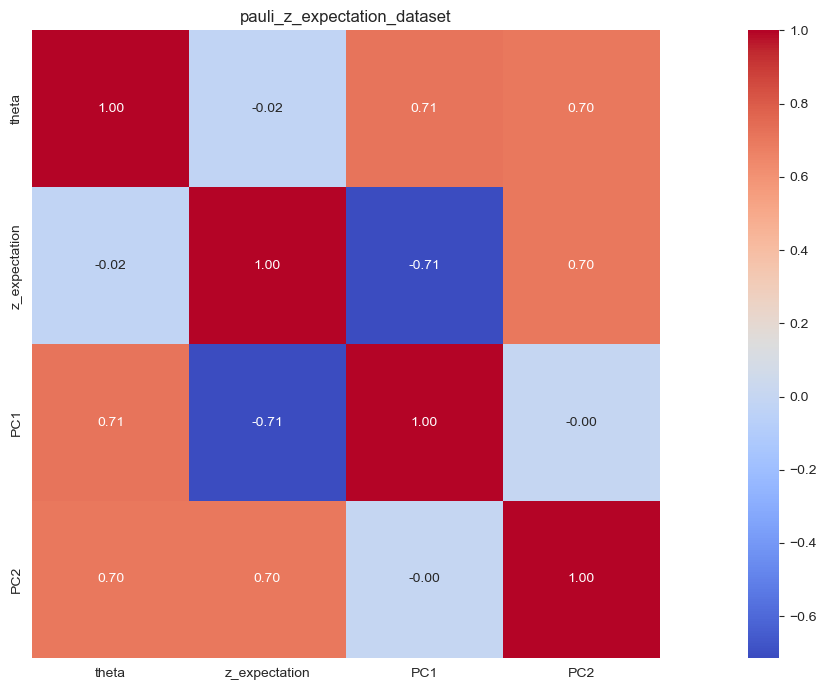

quantum_kernel_data.csv
(5000, 10)


,x1,x2,x3,x1',x2',x3',"K(x,x')",PC1,PC2,PC3
0,-0.443254,1.563877,0.819533,0.333893,-1.201492,-1.179157,1.249027,-0.148083,0.131712,-2.495308
1,-1.552425,1.272133,0.361964,0.712475,-1.672360,1.630464,-0.777219,1.864350,-0.394018,-0.248561
2,1.161681,-0.984274,-1.103926,-1.102918,-0.686158,0.093803,0.787467,-0.284368,-1.161820,-0.288110
3,-0.242051,-0.712023,0.399505,-1.254852,-0.728218,-0.452973,0.602822,-0.372855,0.424199,-0.931716
4,-0.157494,0.992600,-1.041524,0.041780,0.315740,-1.557301,1.007542,-0.288999,-0.470223,-1.489091


,count,mean,std,min,25%,50%,75%,max
x1,5000.0,1.517009e-16,1.000100,-1.755568,-0.851727,0.007006,0.863187,1.748702
x2,5000.0,-1.023182e-16,1.000100,-1.716879,-0.869152,-0.006426,0.867576,1.733621
x3,5000.0,-1.136868e-17,1.000100,-1.738535,-0.861671,0.001264,0.841372,1.753744
x1',5000.0,6.821210e-17,1.000100,-1.737345,-0.873543,0.002499,0.869320,1.721590
x2',5000.0,-7.105427e-17,1.000100,-1.743887,-0.869525,-0.001056,0.866105,1.731098
x3',5000.0,-5.258016e-17,1.000100,-1.717541,-0.865958,0.010975,0.857855,1.733207
"K(x,x')",5000.0,2.582823e-16,1.000100,-1.209646,-0.805903,-0.351609,0.667289,2.476913
PC1,5000.0,-2.131628e-17,1.026395,-3.217283,-0.722013,0.002565,0.721221,3.225832
PC2,5000.0,-1.669775e-17,1.018391,-3.013830,-0.708523,-0.011182,0.735453,3.047089
PC3,5000.0,1.350031e-17,1.010068,-3.537750,-0.684274,0.028134,0.707846,2.819203


x1         float64
x2         float64
x3         float64
x1'        float64
x2'        float64
x3'        float64
K(x,x')    float64
PC1        float64
PC2        float64
PC3        float64
dtype: object

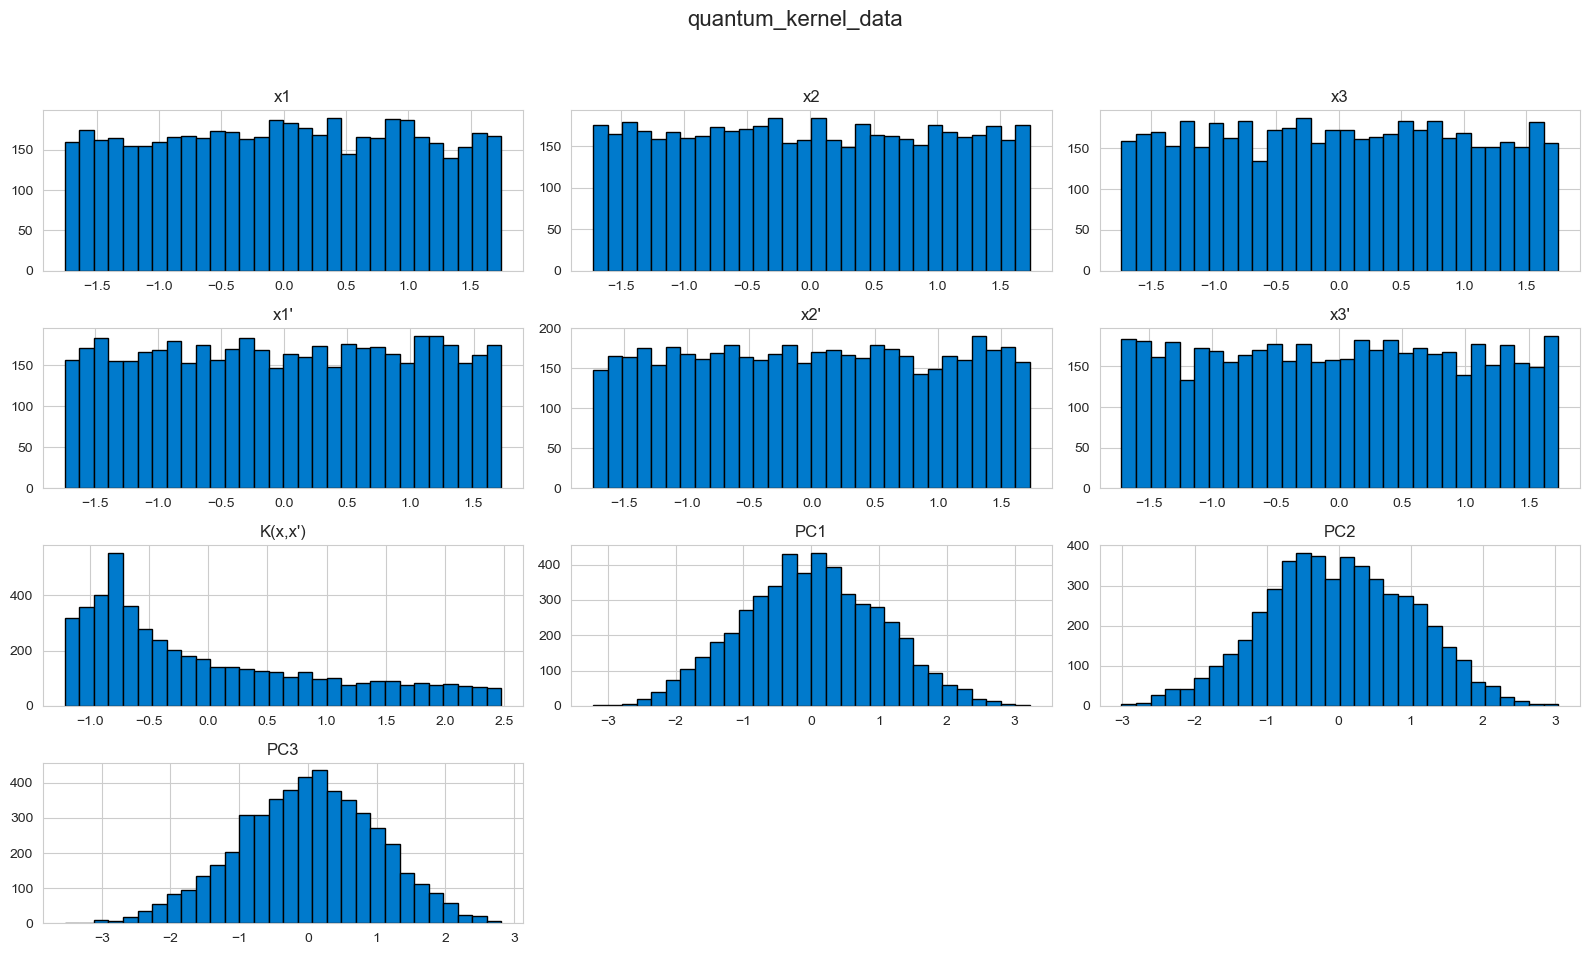

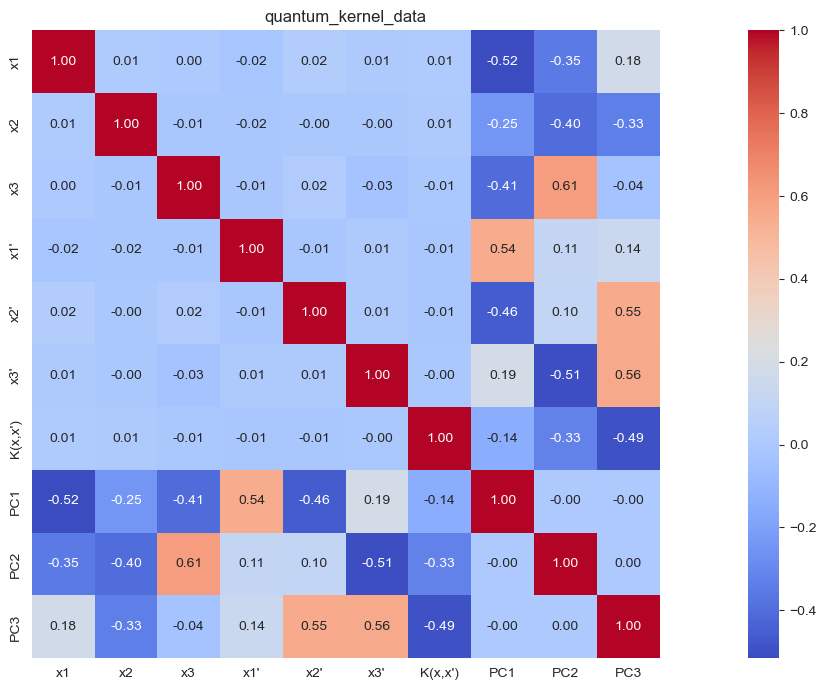

qubit_dataset.csv
(5000, 15)


,alpha_real,alpha_imag,beta_real,beta_imag,|α|²,|β|²,norm_check,theta,phi,bloch_x,bloch_y,bloch_z,PC1,PC2,PC3
0,-0.114121,0.856500,-1.668634,-0.759333,-1.128280,1.128280,-2.220446e-16,1.038094,-1.751322,-0.403727,1.276805,-1.128280,-2.272837,-1.919981,-1.798543
1,-0.086874,1.685075,1.093464,-0.166263,0.689157,-0.689157,2.220446e-16,-0.599994,-0.708027,-0.309667,-1.526214,0.689157,1.296224,-1.494244,1.735316
2,0.977089,0.283381,-1.365359,-1.068412,-0.842368,0.842368,0.000000e+00,0.744587,-1.090081,-1.397807,-0.580653,-0.842368,-1.641595,-1.347401,-0.562156
3,-1.018586,-0.065725,0.149757,-1.710543,-0.854809,0.854809,-2.220446e-16,0.756615,0.611956,-0.008909,1.523183,-0.854809,-1.670976,-0.276696,-1.652113
4,1.879104,0.084952,-0.298181,-0.585049,1.368170,-1.368170,0.000000e+00,-1.334920,-0.827803,-0.511986,-0.910350,1.368170,2.720186,-1.006119,0.877413


,count,mean,std,min,25%,50%,75%,max
alpha_real,5000.0,-1.918465e-17,1.000100e+00,-2.000686e+00,-0.800731,-0.010276,0.836657,1.976784e+00
alpha_imag,5000.0,1.989520e-17,1.000100e+00,-1.971490e+00,-0.836352,-0.004046,0.810105,1.994125e+00
beta_real,5000.0,2.344791e-17,1.000100e+00,-2.019509e+00,-0.812379,0.024099,0.792947,2.015087e+00
beta_imag,5000.0,-1.989520e-17,1.000100e+00,-1.988172e+00,-0.813664,0.006471,0.808781,1.976459e+00
|α|²,5000.0,-2.842171e-18,1.000100e+00,-1.753718e+00,-0.871976,0.007261,0.857615,1.738992e+00
|β|²,5000.0,-1.179501e-16,1.000100e+00,-1.738992e+00,-0.857615,-0.007261,0.871976,1.753718e+00
norm_check,5000.0,6.838974e-18,1.868731e-16,-7.771561e-16,0.000000,0.000000,0.000000,8.881784e-16
theta,5000.0,-7.673862e-17,1.000100e+00,-2.301048e+00,-0.759681,-0.005400,0.773301,2.313190e+00
phi,5000.0,-4.618528e-18,1.000100e+00,-2.470688e+00,-0.712827,-0.014492,0.733006,2.399139e+00
bloch_x,5000.0,-2.842171e-17,1.000100e+00,-1.733975e+00,-0.858385,-0.017037,0.859119,1.728864e+00


alpha_real    float64
alpha_imag    float64
beta_real     float64
beta_imag     float64
|α|²          float64
|β|²          float64
norm_check    float64
theta         float64
phi           float64
bloch_x       float64
bloch_y       float64
bloch_z       float64
PC1           float64
PC2           float64
PC3           float64
dtype: object

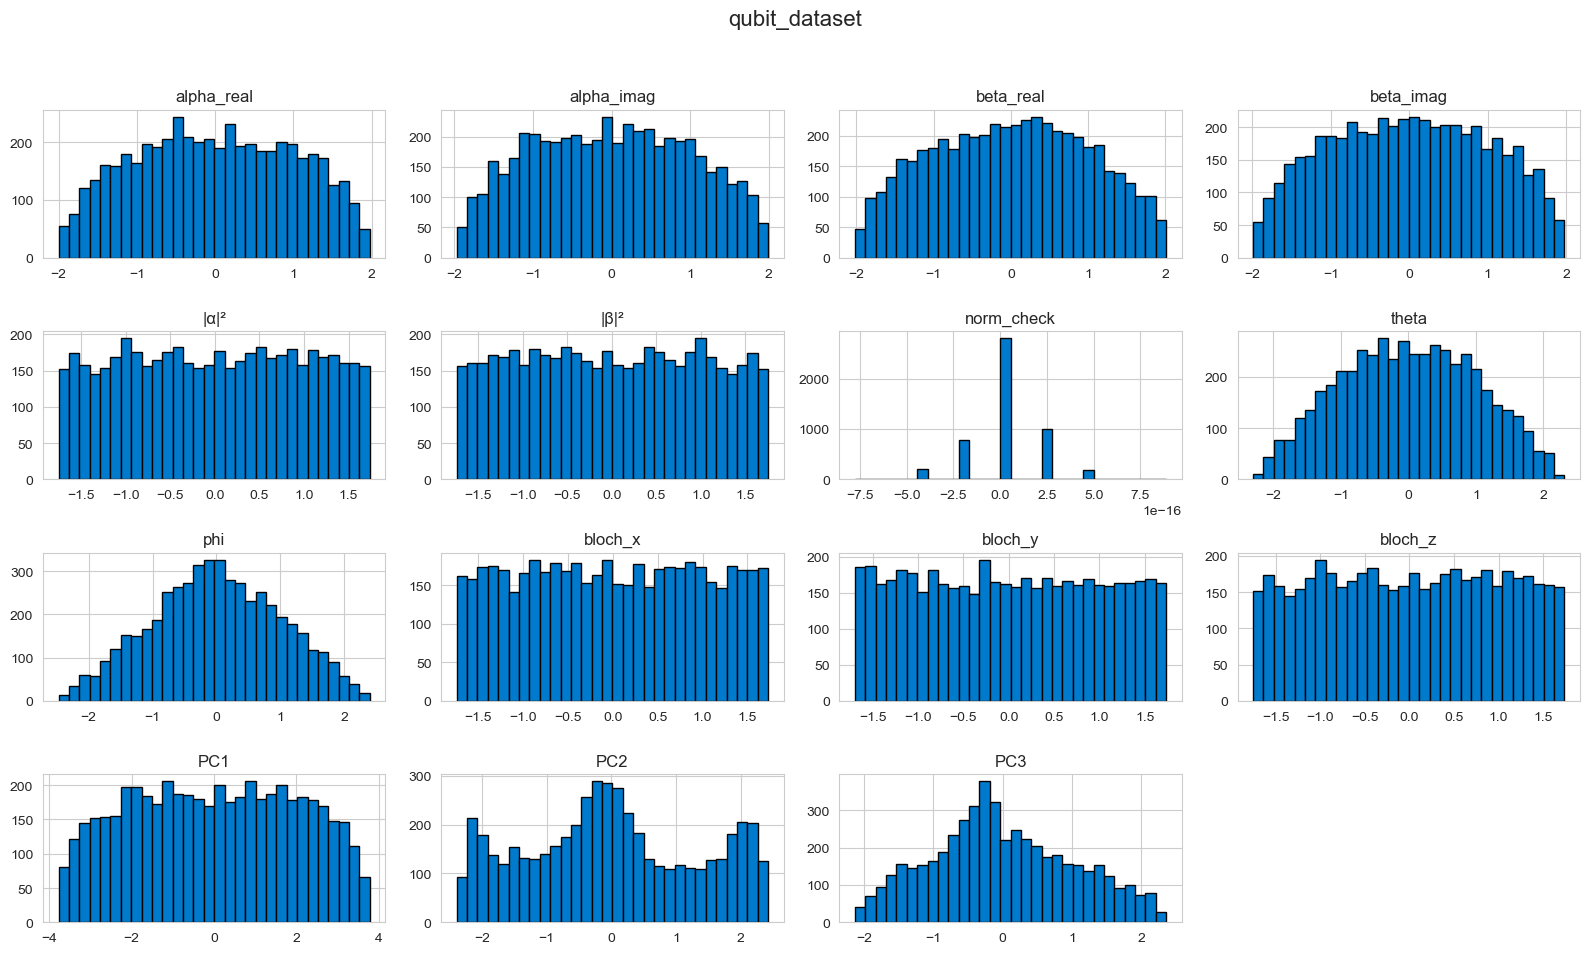

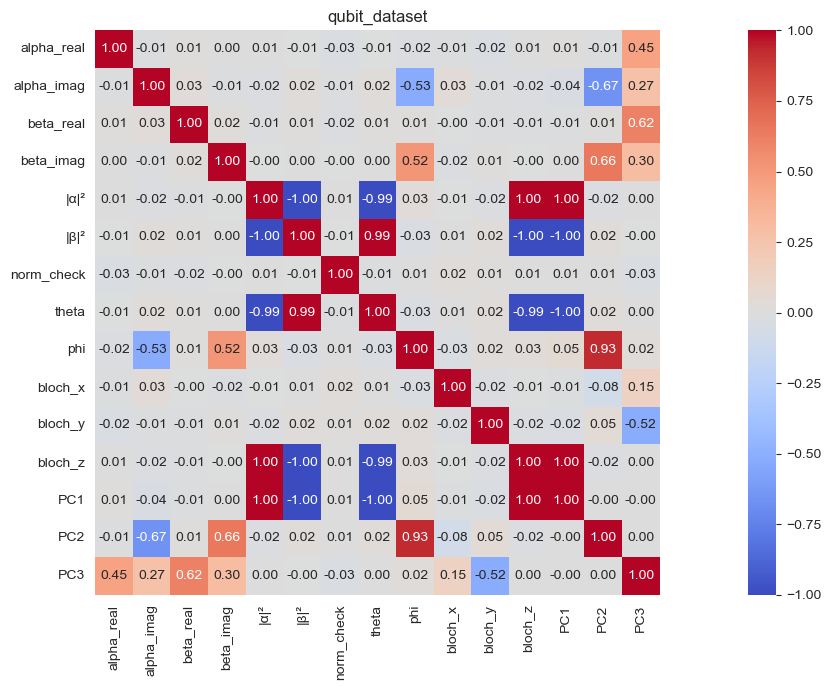

qubit_states_dataset.csv
(5000, 13)


,alpha_real,alpha_imag,beta_real,beta_imag,norm_check,theta,phi,bloch_x,bloch_y,bloch_z,PC1,PC2,PC3
0,-0.114121,0.856500,-1.668634,-0.759333,-2.220446e-16,1.038094,-0.716345,-0.403727,1.276805,-1.128280,1.688974,-1.255037,0.457868
1,-0.086874,1.685075,1.093464,-0.166263,2.220446e-16,-0.599994,0.736691,-0.309667,-1.526214,0.689157,-1.033859,1.535975,0.946268
2,0.977089,0.283381,-1.365359,-1.068412,0.000000e+00,0.744587,0.204590,-1.397807,-0.580653,-0.842368,1.009054,0.656623,-0.717868
3,-1.018586,-0.065725,0.149757,-1.710543,-2.220446e-16,0.756615,-0.882941,-0.008909,1.523183,-0.854809,1.338828,-1.573242,0.967893
4,1.879104,0.084952,-0.298181,-0.585049,0.000000e+00,-1.334920,0.569874,-0.511986,-0.910350,1.368170,-2.056275,0.879808,-0.582687


,count,mean,std,min,25%,50%,75%,max
alpha_real,5000.0,-1.918465e-17,1.000100e+00,-2.000686e+00,-0.800731,-0.010276,0.836657,1.976784e+00
alpha_imag,5000.0,1.989520e-17,1.000100e+00,-1.971490e+00,-0.836352,-0.004046,0.810105,1.994125e+00
beta_real,5000.0,2.344791e-17,1.000100e+00,-2.019509e+00,-0.812379,0.024099,0.792947,2.015087e+00
beta_imag,5000.0,-1.989520e-17,1.000100e+00,-1.988172e+00,-0.813664,0.006471,0.808781,1.976459e+00
norm_check,5000.0,6.838974e-18,1.868731e-16,-7.771561e-16,0.000000,0.000000,0.000000,8.881784e-16
theta,5000.0,-7.673862e-17,1.000100e+00,-2.301048e+00,-0.759681,-0.005400,0.773301,2.313190e+00
phi,5000.0,-7.815970e-18,1.000100e+00,-1.749687e+00,-0.849843,0.009551,0.865291,1.707911e+00
bloch_x,5000.0,2.842171e-17,1.000100e+00,-1.733975e+00,-0.858385,-0.017037,0.859119,1.728864e+00
bloch_y,5000.0,1.705303e-17,1.000100e+00,-1.698199e+00,-0.876353,-0.009529,0.860634,1.738102e+00
bloch_z,5000.0,1.421085e-17,1.000100e+00,-1.753718e+00,-0.871976,0.007261,0.857615,1.738992e+00


alpha_real    float64
alpha_imag    float64
beta_real     float64
beta_imag     float64
norm_check    float64
theta         float64
phi           float64
bloch_x       float64
bloch_y       float64
bloch_z       float64
PC1           float64
PC2           float64
PC3           float64
dtype: object

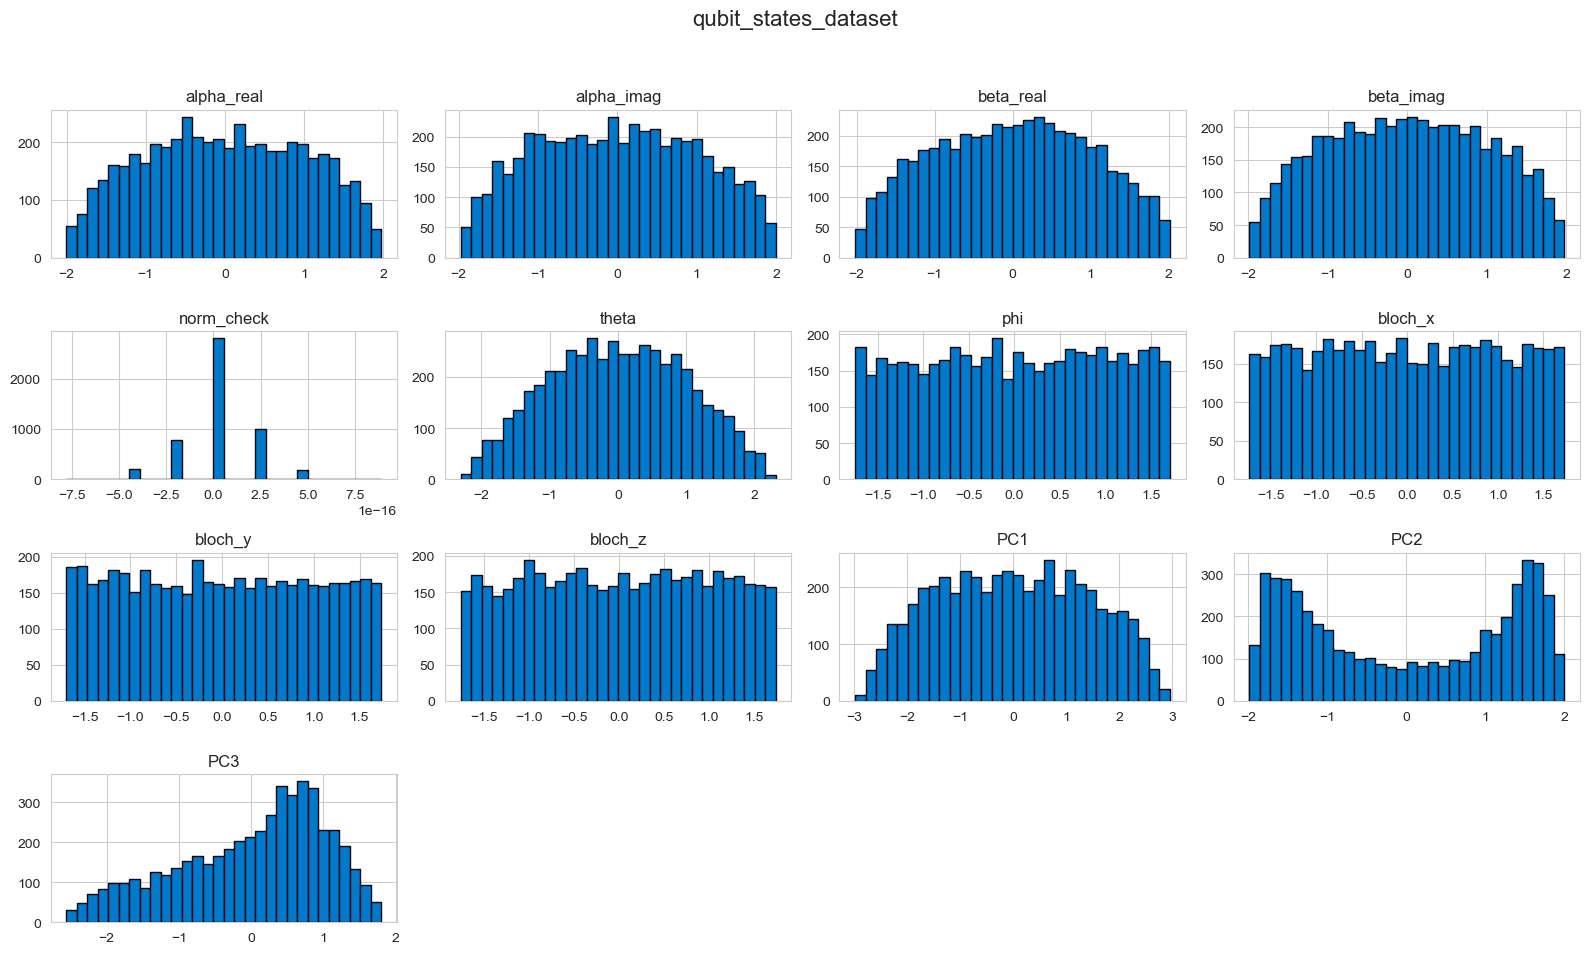

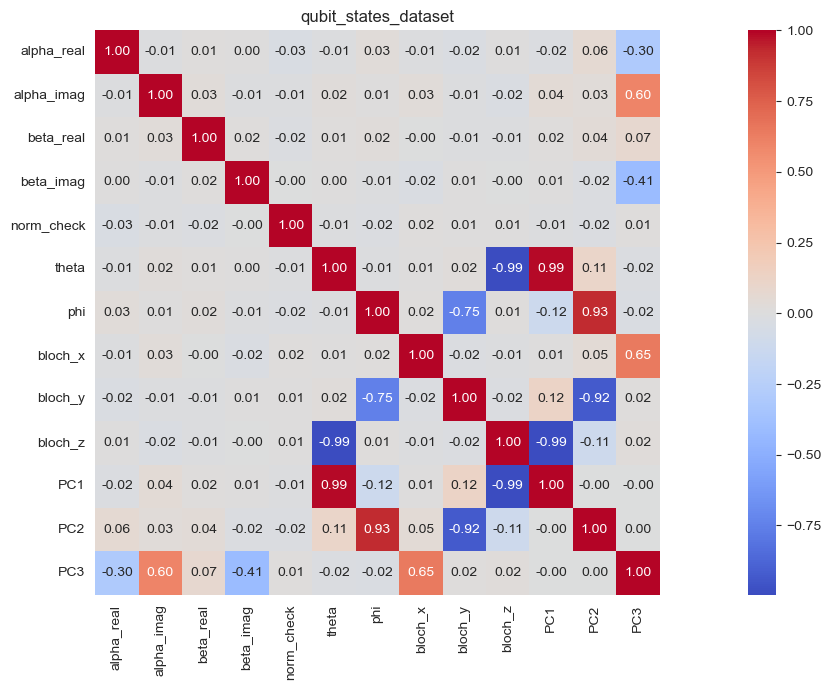

ry_rotation_data.csv
(5000, 14)


,Re(a),Im(a),Re(b),Im(b),θ,Re(Ryψ₀),Im(Ryψ₀),Re(Ryψ₁),Im(Ryψ₁),P0,P1,PC1,PC2,PC3
0,-0.744440,1.059618,0.359504,-0.078223,-1.193101,0.651177,1.672588,0.745657,1.005447,-1.061898,1.061898,-2.780856,-1.364405,0.251381
1,-1.269027,-1.632056,1.575436,0.496750,0.731325,-1.090705,-0.486826,-1.596282,-1.394818,0.857620,-0.857620,2.890047,-0.575453,-0.529510
2,-1.825160,1.340655,0.855835,-1.227262,-1.103142,-0.129006,2.018543,0.645235,0.625497,-0.290922,0.290922,-1.793632,-2.786758,-0.434125
3,-0.871969,-0.165982,1.033944,0.497024,-0.721766,-0.279553,0.189624,0.785127,0.902382,-0.939321,0.939321,-1.462802,-0.844850,0.079721
4,1.442368,-1.102276,-0.290521,0.084913,-0.147141,0.044381,-0.385422,1.313285,-0.098713,-0.742705,0.742705,-0.982857,1.859819,-0.860331


,count,mean,std,min,25%,50%,75%,max
Re(a),5000.0,-2.245315e-16,1.000100,-1.892815,-0.791528,0.082481,0.774396,2.347379
Im(a),5000.0,1.016076e-16,1.000100,-1.864963,-0.820144,0.078822,0.779975,2.357431
Re(b),5000.0,-1.598721e-16,1.000100,-1.877855,-0.804165,0.084610,0.766307,2.369281
Im(b),5000.0,9.734435e-17,1.000100,-1.933533,-0.809515,0.101223,0.758139,2.349393
θ,5000.0,-7.815970e-17,1.000100,-1.736503,-0.860196,-0.013474,0.865201,1.747827
Re(Ryψ₀),5000.0,1.193712e-16,1.000100,-1.729946,-0.797892,-0.188225,0.695517,2.931937
Im(Ryψ₀),5000.0,-1.989520e-17,1.000100,-1.756809,-0.812925,-0.173499,0.661419,3.092880
Re(Ryψ₁),5000.0,3.836931e-17,1.000100,-3.088212,-0.678787,0.171332,0.794055,1.731789
Im(Ryψ₁),5000.0,6.750156e-17,1.000100,-2.998618,-0.719805,0.181545,0.814191,1.704482
P0,5000.0,-3.019807e-16,1.000100,-1.567215,-0.925942,-0.001885,0.928995,1.590121


Re(a)       float64
Im(a)       float64
Re(b)       float64
Im(b)       float64
θ           float64
Re(Ryψ₀)    float64
Im(Ryψ₀)    float64
Re(Ryψ₁)    float64
Im(Ryψ₁)    float64
P0          float64
P1          float64
PC1         float64
PC2         float64
PC3         float64
dtype: object

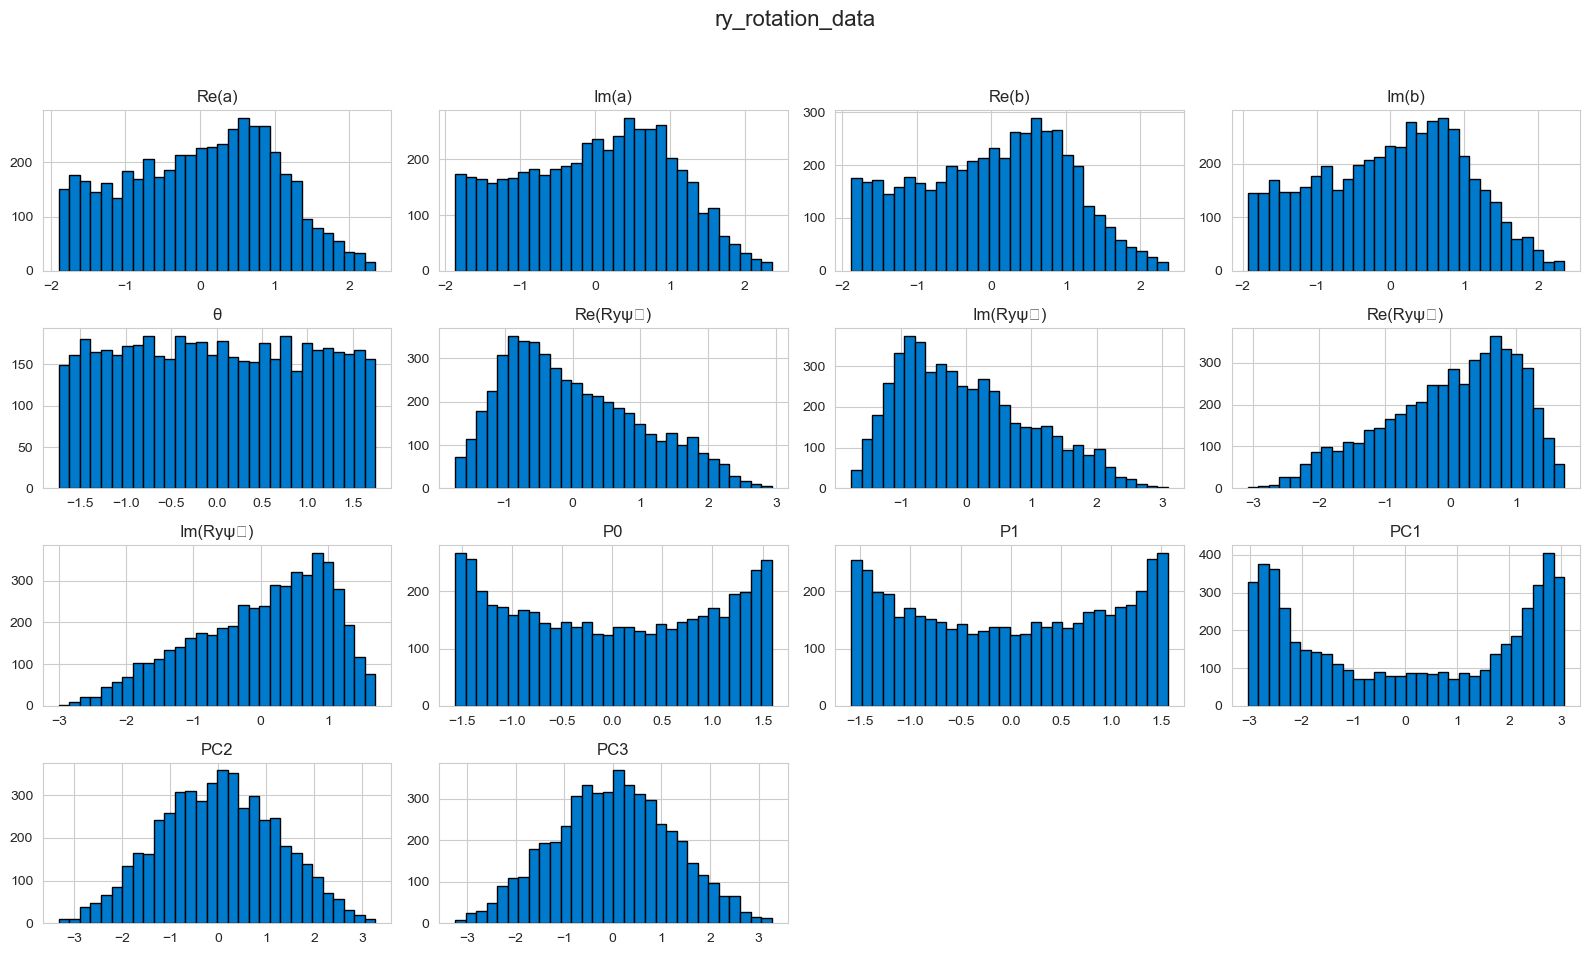

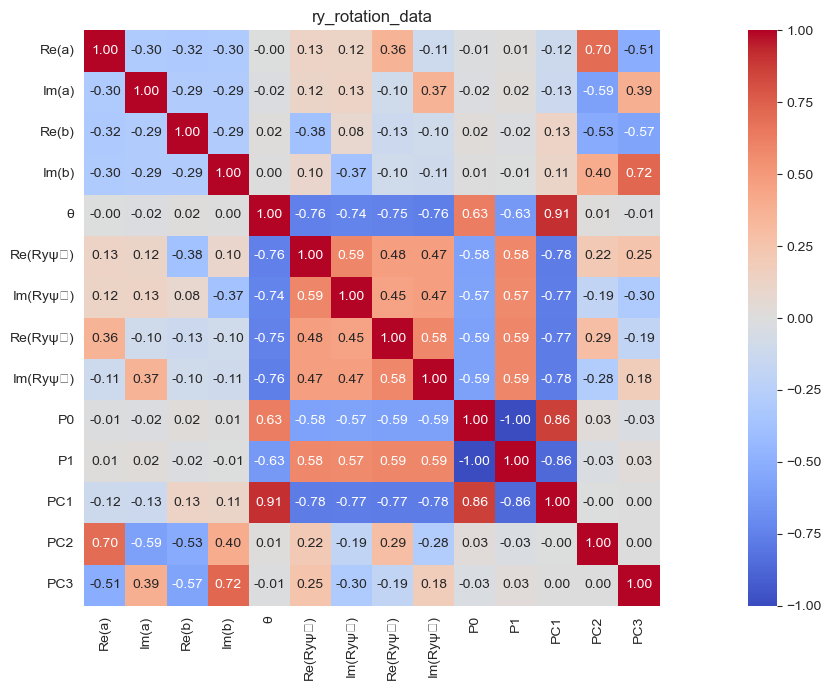

simulated_feature_map_dataset.csv
(3000, 12)


,x1,x2,x3,amp_0_real,amp_1_real,amp_2_real,amp_0_imag,amp_1_imag,amp_2_imag,PC1,PC2,PC3
0,-0.456864,1.585930,0.847401,0.982362,-1.323996,0.168055,-1.012103,0.470332,1.449201,0.753216,-1.635150,1.665131
1,0.331359,-1.155962,-1.137625,1.137842,-0.773223,-0.774912,0.795946,-1.162618,-1.144222,-0.681588,1.387658,-1.891444
2,-1.569839,1.294253,0.396363,-1.358361,-0.926430,1.142257,-0.518437,1.103803,0.880286,1.415080,-1.542316,1.285838
3,0.716167,-1.623243,1.667314,0.347405,-1.378584,-1.373632,1.334896,-0.153449,0.303789,-2.300158,0.049295,0.389525
4,1.153576,-0.961643,-1.048607,-0.731490,-0.324494,-0.575663,1.199385,-1.366085,-1.256639,-1.211987,2.034119,-1.615440


,count,mean,std,min,25%,50%,75%,max
x1,3000.0,3.315866e-17,1.000167,-1.773645,-0.869745,0.021241,0.871591,1.741881
x2,3000.0,-2.575717e-17,1.000167,-1.694224,-0.867762,-0.012732,0.862033,1.754452
x3,3000.0,-1.657933e-17,1.000167,-1.675111,-0.872604,-0.018123,0.838953,1.768280
amp_0_real,3000.0,3.967197e-17,1.000167,-1.452404,-0.995681,-0.001630,0.994575,1.403525
amp_1_real,3000.0,-4.263256e-17,1.000167,-1.390211,-1.009209,-0.032050,1.026774,1.393895
amp_2_real,3000.0,2.220446e-17,1.000167,-1.398718,-1.001865,0.017980,0.986220,1.416945
amp_0_imag,3000.0,-2.960595e-17,1.000167,-1.419730,-1.006015,0.033443,1.003333,1.383244
amp_1_imag,3000.0,-3.315866e-17,1.000167,-1.406162,-0.980769,-0.024594,0.981956,1.470250
amp_2_imag,3000.0,-4.500104e-17,1.000167,-1.385089,-0.992902,-0.059302,1.010843,1.458290
PC1,3000.0,-1.184238e-18,1.352849,-2.904034,-0.964449,-0.015641,0.985485,2.913606


x1            float64
x2            float64
x3            float64
amp_0_real    float64
amp_1_real    float64
amp_2_real    float64
amp_0_imag    float64
amp_1_imag    float64
amp_2_imag    float64
PC1           float64
PC2           float64
PC3           float64
dtype: object

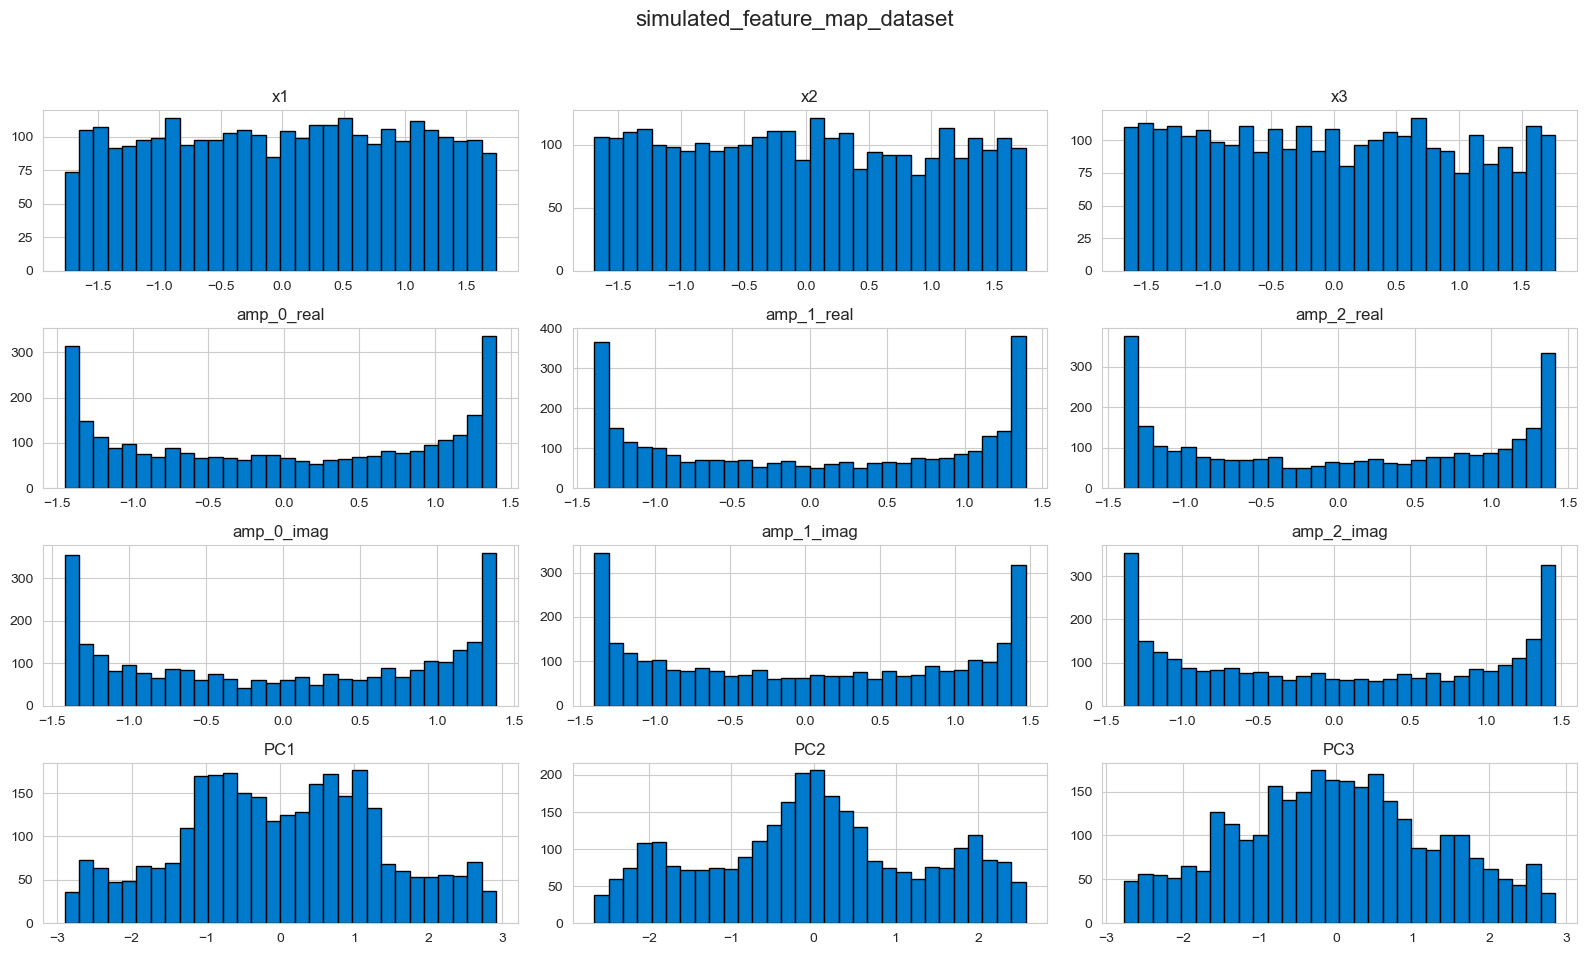

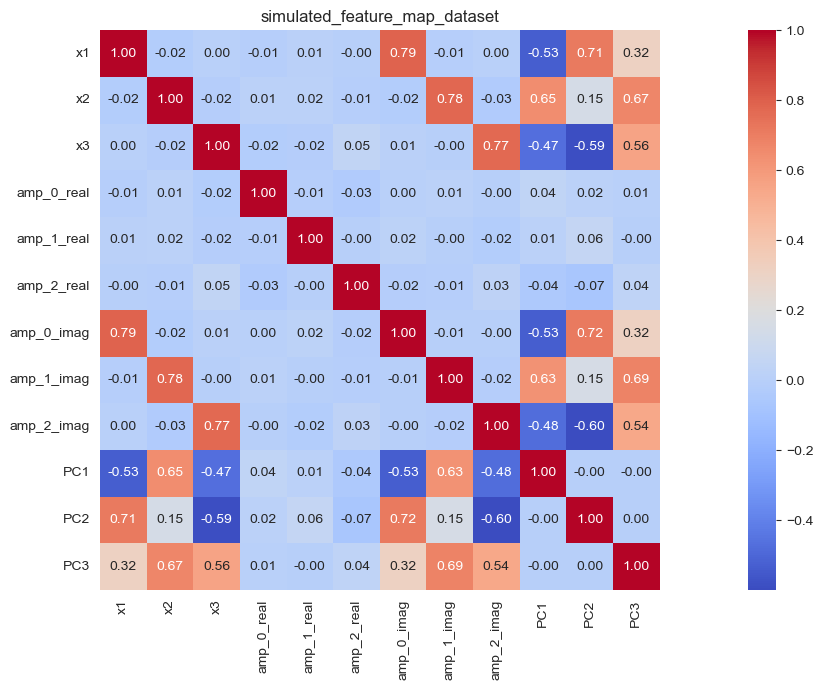

softmax_dataset.csv
(5000, 13)


,z1,z2,z3,z4,z5,sigma1,sigma2,sigma3,sigma4,sigma5,PC1,PC2,PC3
0,0.478373,-0.158692,0.662546,1.552308,-0.245534,-0.211269,-0.689405,-0.012902,1.677645,-0.736206,-0.746936,2.106471,-0.250659
1,-0.239628,1.569897,0.782050,-0.456629,0.541911,-0.753351,1.666887,0.094765,-0.837233,-0.190717,1.028907,-1.969293,0.528118
2,-0.464878,-0.488276,0.257638,-1.912342,-1.756895,0.106981,0.102604,1.536516,-0.899038,-0.848690,0.904131,-0.149667,2.478695
3,-0.562009,-1.038916,0.329778,-0.898795,-1.439962,-0.056439,-0.481843,1.649679,-0.372261,-0.724704,-0.175893,0.623605,2.170340
4,1.430272,-0.246770,0.083556,-1.419781,-0.560049,2.506357,-0.539130,-0.275484,-1.006759,-0.724268,2.110049,0.806191,0.915604


,count,mean,std,min,25%,50%,75%,max
z1,5000.0,-5.684342e-18,1.000100,-3.863046,-0.673207,0.002833,0.684937,3.847600
z2,5000.0,-4.973799e-18,1.000100,-3.731760,-0.656827,-0.015955,0.656261,3.948303
z3,5000.0,-6.394885e-18,1.000100,-3.611698,-0.699468,0.003857,0.671024,3.161859
z4,5000.0,1.065814e-17,1.000100,-3.318464,-0.673312,0.018521,0.671101,4.532741
z5,5000.0,1.421085e-18,1.000100,-3.917801,-0.675232,0.002205,0.688864,3.897816
sigma1,5000.0,2.557954e-17,1.000100,-1.207482,-0.770543,-0.287090,0.499225,4.157051
sigma2,5000.0,1.492140e-17,1.000100,-1.214036,-0.752565,-0.304207,0.470009,4.358786
sigma3,5000.0,-9.876544e-17,1.000100,-1.201543,-0.752260,-0.300096,0.471364,4.024947
sigma4,5000.0,-1.733724e-16,1.000100,-1.200560,-0.760480,-0.301472,0.476185,4.655238
sigma5,5000.0,1.563194e-17,1.000100,-1.214473,-0.761448,-0.292497,0.505267,4.272037


z1        float64
z2        float64
z3        float64
z4        float64
z5        float64
sigma1    float64
sigma2    float64
sigma3    float64
sigma4    float64
sigma5    float64
PC1       float64
PC2       float64
PC3       float64
dtype: object

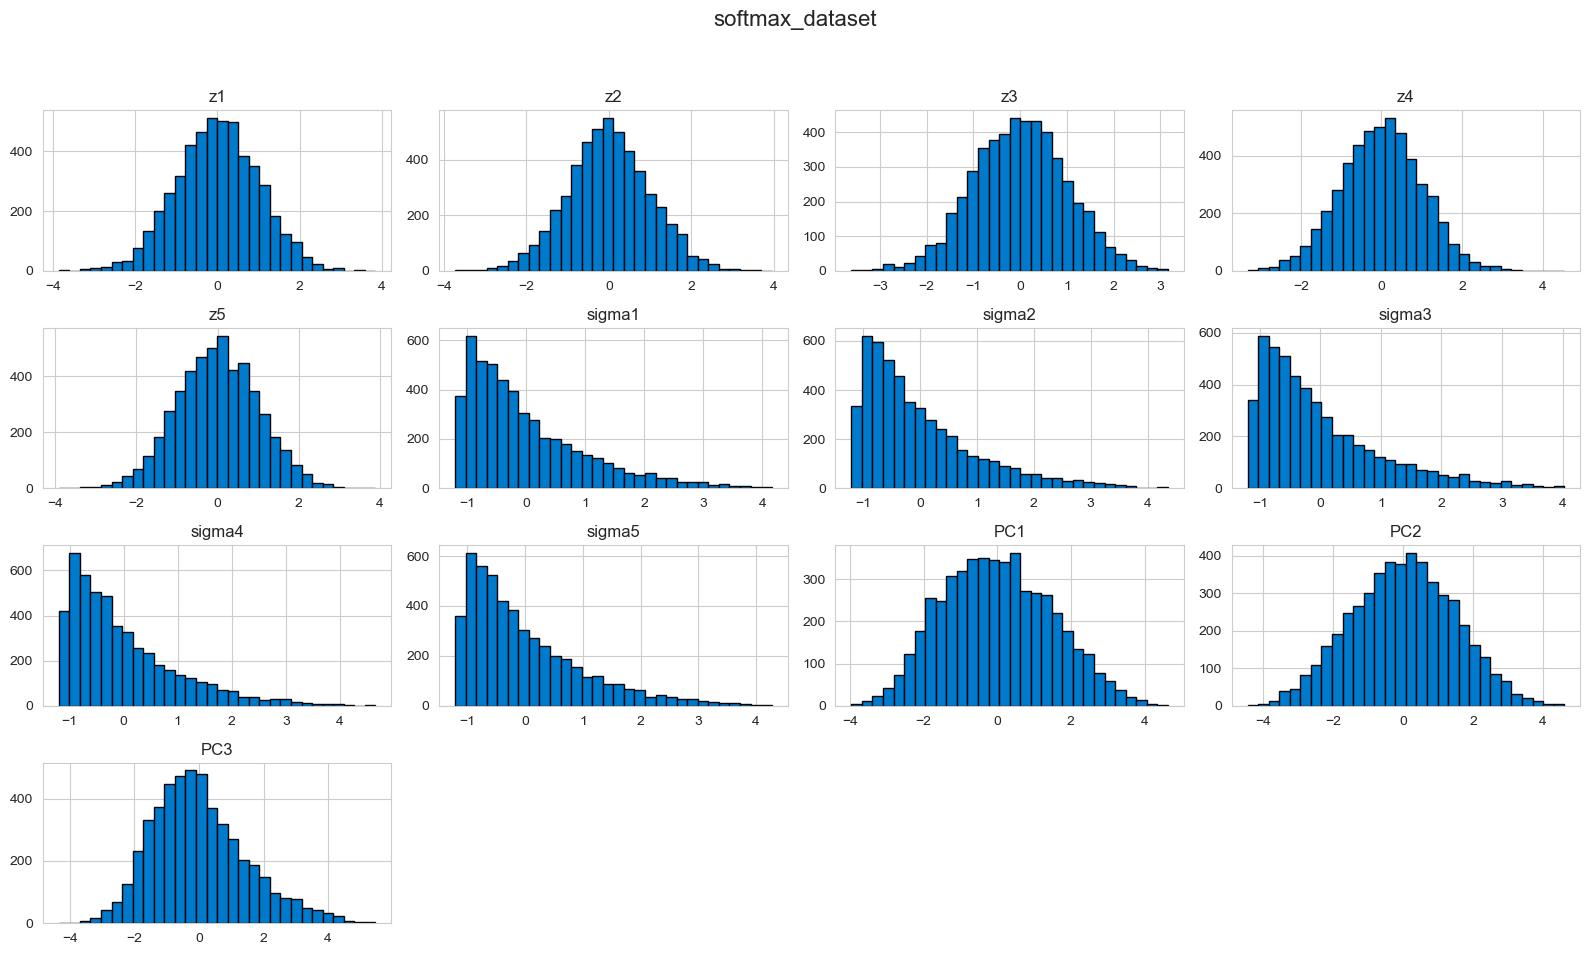

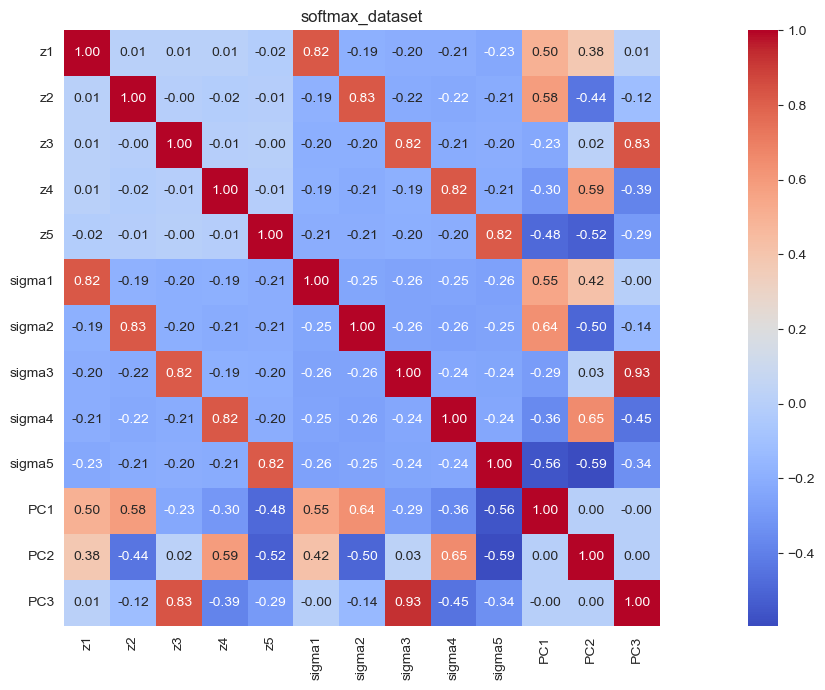

In [16]:
for csv_file in csv_files:
    run_eda_on_file(csv_file)